In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

import cmocean
import cmocean.cm as cmo
import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df_o2 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/O2_Summary_Stats.csv', sep=',', index_col=0)

flux_cdom_bc_350 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_bc_350.csv', sep=',', index_col=0)
flux_cdom_bc_412 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_bc_412.csv', sep=',', index_col=0)

flux_cdom_pw_350 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_350.csv', sep=',', index_col=0)
flux_cdom_pw_412 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_412.csv', sep=',', index_col=0)


flux_doc_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_bc.csv', sep=',', index_col=0)
flux_doc_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_pw.csv', sep=',', index_col=0)

flux_tn_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_bc.csv', sep=',', index_col=0)
flux_tn_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_pw.csv', sep=',', index_col=0)

flux_fe2_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_bc.csv', sep=',', index_col=0)
flux_fe2_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_pw.csv', sep=',', index_col=0)
flux_fe3_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_bc.csv', sep=',', index_col=0)
flux_fe3_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_pw.csv', sep=',', index_col=0)

fe_stocks_5cm = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Iron_stocks_5CM.csv', sep=',', index_col=0)
fe_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Iron_stocks.csv', sep=',', index_col=0)

flux_inflection_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_inflection_bc.csv', sep=',', index_col=0)

ncs_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv', sep=',', index_col=0)
wc_doc_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Water_col_DOC_stocks.csv', sep=',', index_col=0)

In [3]:
flux_cdom_bc_412_join = flux_cdom_bc_412['bc_flux_aCDOM412']
flux_cdom_bc_350_join = flux_cdom_bc_350['bc_flux_aCDOM350']

flux_cdom_pw_350_join = flux_cdom_pw_350['pw_flux_aCDOM350']
flux_cdom_pw_412_join = flux_cdom_pw_412['pw_flux_aCDOM412']


flux_doc_bc_join = flux_doc_bc['bc_flux_doc']
flux_doc_pw_join = flux_doc_pw['pw_flux_doc']

flux_tn_bc_join = flux_tn_bc['bc_flux_tn']
flux_tn_pw_join = flux_tn_pw['pw_flux_tn']

flux_fe2_bc_join = flux_fe2_bc['bc_flux_fe2']
flux_fe2_pw_join = flux_fe2_pw['pw_flux_fe2']

flux_fe3_bc_join = flux_fe3_bc['bc_flux_fe3']
flux_fe3_pw_join = flux_fe3_pw['pw_flux_fe3']

fe_stocks_join = fe_stocks.drop(columns=['camp', 'Stn'])

df = df_o2.join(ncs_stocks)
df = df.join(fe_stocks_join)
df = df.join(wc_doc_stocks)
df = df.join(flux_inflection_bc)

df = df.join(flux_cdom_bc_412_join)
df = df.join(flux_cdom_pw_412_join)

df = df.join(flux_cdom_bc_350_join)
df = df.join(flux_cdom_pw_350_join)

df = df.join(flux_doc_bc_join)
df = df.join(flux_doc_pw_join)

df = df.join(flux_tn_bc_join)
df = df.join(flux_tn_pw_join)

df = df.join(flux_fe2_bc_join)
df = df.join(flux_fe2_pw_join)

df = df.join(flux_fe3_bc_join)
df = df.join(flux_fe3_pw_join)

df['Camp'] = df["camp"]
df['Stn'] = df["station"]
df = df.drop(columns=['code.1'])

#df.to_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_Stock_O2_summary.csv')

df

camp  station        date  Max_pressure  \
code                                                          
St.11_GOM2021    GOM2021    St.11  2021-07-25       946.986   
St.13_GOM2021    GOM2021    St.13  2021-07-21       321.519   
St.14_GOM2021    GOM2021    St.14  2021-07-19        91.278   
St.15_GOM2021    GOM2021    St.15  2021-07-23       287.295   
St.16_GOM2021    GOM2021    St.16  2021-07-24        61.804   
St.2_GOM2021     GOM2021     St.2  2021-07-22        63.413   
St.4_GOM2021     GOM2021     St.4  2021-07-17        17.437   
St.5B_GOM2021    GOM2021    St.5B  2021-07-16        12.856   
St.7_GOM2021     GOM2021     St.7  2021-07-26        39.529   
St.9_GOM2021     GOM2021     St.9  2021-07-20        79.028   
St.MK_GOM2021    GOM2021    St.MK  2021-07-15        16.981   
St.ML_GOM2021    GOM2021    St.ML  2021-07-27        14.595   
St.11_GOM21FA    GOM21FA    St.11  2021-11-10       916.966   
St.12_GOM21FA    GOM21FA    St.12  2021-11-09       960.512   
St.13_GOM21FA    GOM21FA    St.13  2021-11-07       448.876   
St.14_GOM21FA    GOM21FA    St.14  2021-10-31        88.896   
St.14.5_GOM21FA  GOM21FA  St.14.5  2021-11-01       104.344   
St.15_GOM21FA    GOM21FA    St.15  2021-11-02       263.293   
St.16_GOM21FA    GOM21FA    St.16  2021-11-08        58.940   
St.16-2_GOM21FA  GOM21FA  St.16-2  2021-11-12        15.517   
St.2_GOM21FA     GOM21FA     St.2  2021-11-02        62.458   
St.4_GOM21FA     GOM21FA     St.4  2021-10-26        17.006   
St.5B_GOM21FA    GOM21FA    St.5B  2021-10-25        12.869   
St.6_GOM21FA     GOM21FA     St.6  2021-10-25        13.849   
St.7_GOM21FA     GOM21FA     St.7  2021-10-31        38.371   
St.9_GOM21FA     GOM21FA     St.9  2021-11-01        81.090   
St.MK_GOM21FA    GOM21FA    St.MK  2021-10-27        17.149   
St.MK-2_GOM21FA  GOM21FA  St.MK-2  2021-10-30        13.611   
St.13_GOM22SP    GOM22SP    St.13  2022-04-18       557.668   
St.14_GOM22SP    GOM22SP    St.14  2022-04-09        88.922   
St.15_GOM22SP    GOM22SP    St.15  2022-04-16       263.450   
St.16_GOM22SP    GOM22SP    St.16  2022-04-11        57.412   
St.2_GOM22SP     GOM22SP     St.2  2022-04-17        63.432   
St.4_GOM22SP     GOM22SP     St.4  2022-04-20        16.450   
St.5B_GOM22SP    GOM22SP    St.5B  2022-04-14        13.664   
St.7_GOM22SP     GOM22SP     St.7  2022-04-10        39.548   
St.9_GOM22SP     GOM22SP     St.9  2022-04-16        79.039   
St.MK_GOM22SP    GOM22SP    St.MK  2022-04-19        17.800   
St.11_GOM22SU    GOM22SU    St.11  2022-07-22       945.291   
St.12_GOM22SU    GOM22SU    St.12  2022-07-21       996.658   
St.13_GOM22SU    GOM22SU    St.13  2022-07-18       487.498   
St.14_GOM22SU    GOM22SU    St.14  2022-07-16        86.455   
St.15_GOM22SU    GOM22SU    St.15  2022-07-15       266.624   
St.16_GOM22SU    GOM22SU    St.16  2022-07-20        57.999   
St.2_GOM22SU     GOM22SU     St.2  2022-07-19        62.421   
St.4_GOM22SU     GOM22SU     St.4  2022-07-10        17.075   
St.5B_GOM22SU    GOM22SU    St.5B  2022-07-10        12.409   
St.7_GOM22SU     GOM22SU     St.7  2022-07-12        41.135   
St.9_GOM22SU     GOM22SU     St.9  2022-07-17        79.973   
St.MK_GOM22SU    GOM22SU    St.MK  2022-07-23        17.611   

                 Pressure_dbar_surface  O2_mgL_surface  latitude_surface  \
code                                                                       
St.11_GOM2021                    2.076          7.3366          28.21678   
St.13_GOM2021                    2.283          6.2980          28.53696   
St.14_GOM2021                    1.829          6.3473          28.72514   
St.15_GOM2021                    2.191          9.0433          28.94254   
St.16_GOM2021                    1.277          7.4623          28.88042   
St.2_GOM2021                     2.074          6.8821          28.89964   
St.4_GOM2021                     1.145          8.2318          28.79886   
St.5B_GOM2021                    1.505          7.6929     

In [4]:
flux_doc_pw_join

code
St.11_GOM2021     9.595091
St.11_GOM21FA     8.395524
St.11_GOM22SU    17.588074
St.12_GOM21FA     8.174047
St.12_GOM22SU    15.813140
St.13_GOM21FA    11.983803
St.13_GOM22SP     6.746555
St.13_GOM22SU    13.999296
St.14_GOM2021     9.409872
St.14_GOM21FA     6.158409
St.14_GOM22SP     8.616519
St.14_GOM22SU     9.113496
St.15_GOM2021     1.213608
St.15_GOM21FA     4.631518
St.15_GOM22SP     7.190513
St.15_GOM22SU     9.843884
St.16_GOM2021     9.613803
St.16_GOM21FA     5.550002
St.16_GOM22SP    12.626009
St.2_GOM2021      8.122664
St.2_GOM21FA     14.086635
St.2_GOM22SP      6.440034
St.2_GOM22SU     16.772118
St.4_GOM2021     62.272363
St.4_GOM21FA     10.177357
St.4_GOM22SP      8.395487
St.4_GOM22SU      8.776080
St.5B_GOM2021    79.908417
St.5B_GOM21FA     6.095850
St.5B_GOM22SU    14.842110
St.7_GOM2021     11.807941
St.7_GOM21FA     10.584888
St.7_GOM22SP      6.369804
St.7_GOM22SU     10.808187
St.9_GOM2021     73.674407
St.9_GOM21FA     12.145440
St.9_GOM22SP     11.158

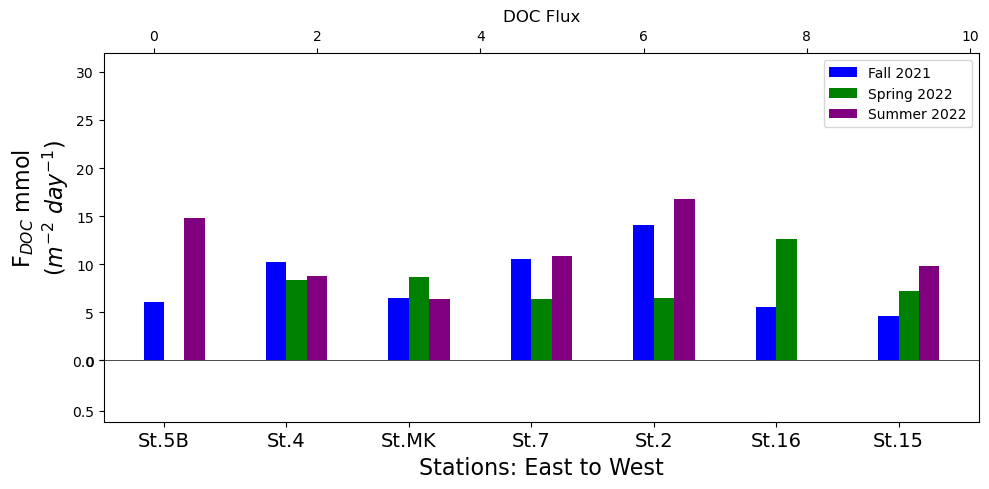

In [5]:

def bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes): 
    df = data_f.dropna(subset=[flux_col])

    categories = ['St.5B','St.4','St.MK','St.7','St.2','St.16','St.15']
    subcategories = ['GOM21FA','GOM22SP', 'GOM22SU']

    # Define custom colors
    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }
    
    barWidth = 0.25

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0)  # Set hspace to 0

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.5, 1.5)
    positions = [r + i*barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            #error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)]['erros_doc'].values
            values.append(value[0] if len(value) > 0 else 0)
            #errors.append(error[0] if len(error) > 0 else 0)
    
        ax1.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
        ax2.bar(pos, [v if v < 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
    
    ax1.set_ylim(0, df[flux_col].max()*.4)  
    ax2.set_ylim(df[flux_col].min()*.5, 0)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop='off')
    ax2.tick_params(labeltop='off')
    ax2.xaxis.tick_bottom()

    # Add some text for labels, title, and custom x-axis tick labels
    ax2.set_xlabel('Stations: East to West', size = 16)
    ax1.set_ylabel(ylabes, size = 16)
    ax1.set_title(tlabes)
    ax2.set_xticks(r + .5*barWidth)  # Adjust for the spaces between groups
    ax2.set_xticklabels(categories, size = 14)

    # Add black horizontal line at y=0
    ax1.axhline(0, color="black", linewidth=0.5)
    ax2.axhline(0, color="black", linewidth=0.5)
    
    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax1.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()
    plt.show()
    

ylabes = r'F$_{DOC}$ mmol '+'\n'+r'$(m^{-2}$ $day^{-1})$'
tlabes = 'DOC Flux'
data_f = flux_doc_pw
flux_col = "pw_flux_doc"

    
bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 



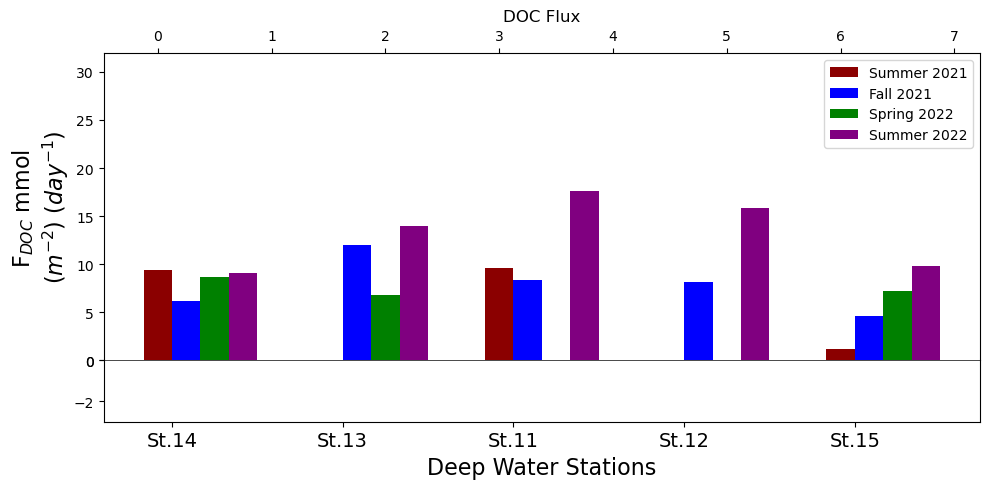

In [6]:

def bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes): 
    df = data_f.dropna(subset=[flux_col])

    categories = ['St.14','St.13','St.11','St.12','St.15']
    subcategories = ['GOM2021','GOM21FA','GOM22SP', 'GOM22SU']

    # Define custom colors
    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }
    
    barWidth = 0.25

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0)  # Set hspace to 0

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.5, 1.5)
    positions = [r + i*barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            #error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)]['erros_doc'].values
            values.append(value[0] if len(value) > 0 else 0)
            #errors.append(error[0] if len(error) > 0 else 0)
    
        ax1.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
        ax2.bar(pos, [v if v < 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
    
    ax1.set_ylim(0, df[flux_col].max()*.4)  
    ax2.set_ylim(-3, 0)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop='off')
    ax2.tick_params(labeltop='off')
    ax2.xaxis.tick_bottom()

    # Add some text for labels, title, and custom x-axis tick labels
    ax2.set_xlabel('Deep Water Stations', size = 16)
    ax1.set_ylabel(ylabes, size = 16)
    ax1.set_title(tlabes)
    ax2.set_xticks(r + .5*barWidth)  # Adjust for the spaces between groups
    ax2.set_xticklabels(categories, size = 14)

    # Add black horizontal line at y=0
    ax1.axhline(0, color="black", linewidth=0.5)
    ax2.axhline(0, color="black", linewidth=0.5)
    
    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax1.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()
    plt.show()
    

ylabes = r'F$_{DOC}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'DOC Flux'
data_f = flux_doc_pw
flux_col = "pw_flux_doc"

    
bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 



C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9928\2601252640.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2.set_yscale('log')
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9928\2601252640.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_ticklabels([str(int(-tick)) for tick in ax2.get_yticks()])
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9928\2601252640.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


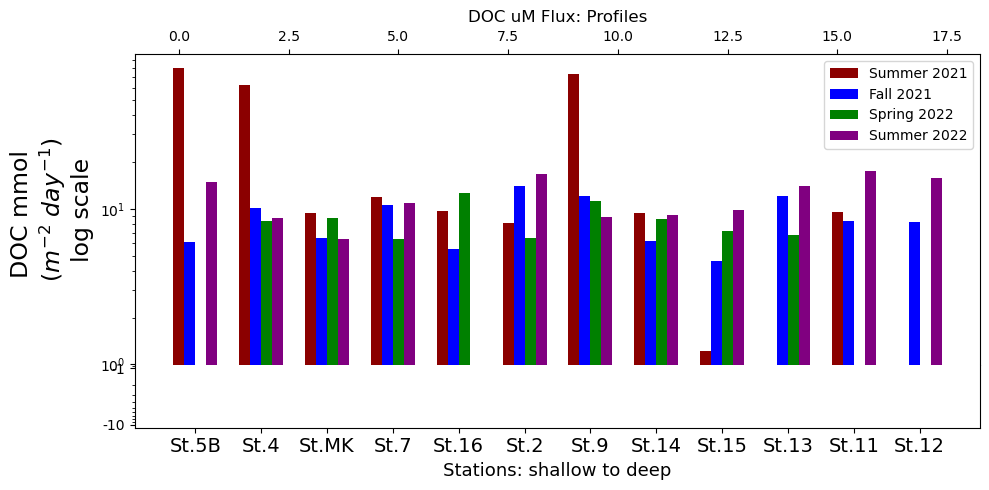

In [7]:

def bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes): 
    df = data_f.dropna(subset=[flux_col])

    categories = ['St.5B','St.4','St.MK','St.7','St.16','St.2','St.9','St.14','St.15','St.13','St.11','St.12']
    subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

    # Define custom colors
    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0)  # Set hspace to 0

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.5, 1.5)
    positions = [r + i*barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            #error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)]['erros_doc'].values
            values.append(value[0] if len(value) > 0 else 0)
            #errors.append(error[0] if len(error) > 0 else 0)
    
        ax1.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
        ax2.bar(pos, [v*-1 if v < 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
    
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    ax2.invert_yaxis()
    ax2.yaxis.set_ticklabels([str(int(-tick)) for tick in ax2.get_yticks()])

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop='off')
    ax2.tick_params(labeltop='off')
    ax2.xaxis.tick_bottom()

    # Add some text for labels, title, and custom x-axis tick labels
    ax2.set_xlabel('Stations: shallow to deep', size = 13)
    ax1.set_ylabel(ylabes, size = 17)
    ax1.set_title(tlabes)
    ax2.set_xticks(r + 1.5*barWidth)  # Adjust for the spaces between groups
    ax2.set_xticklabels(categories, size = 14)

    # Add black horizontal line at y=0
    ax1.axhline(0, color="black", linewidth=0.5)
    ax2.axhline(0, color="black", linewidth=0.5)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax1.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()
    plt.show()
    

ylabes = r'DOC mmol '+'\n'+r'$(m^{-2}$ $day^{-1})$'+'\n'+'log scale'
tlabes = 'DOC uM Flux: Profiles'
data_f = flux_doc_pw
flux_col = "pw_flux_doc"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 


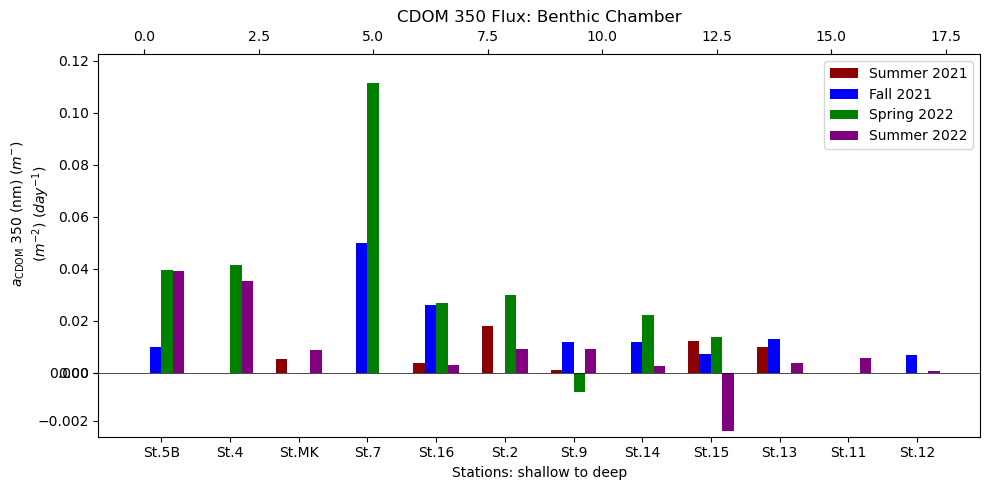

In [8]:
ylabes = r'$a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-})$'+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'CDOM 350 Flux: Benthic Chamber'
data_f = flux_cdom_bc_350
flux_col = "bc_flux_aCDOM350"

def bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes): 
    df = data_f.dropna(subset=[flux_col])

    categories = ['St.5B','St.4','St.MK','St.7','St.16','St.2','St.9','St.14','St.15','St.13','St.11','St.12']
    subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

    # Define custom colors
    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0)  # Set hspace to 0

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.5, 1.5)
    positions = [r + i*barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            #error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)]['erros_doc'].values
            values.append(value[0] if len(value) > 0 else 0)
            #errors.append(error[0] if len(error) > 0 else 0)
    
        ax1.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
        ax2.bar(pos, [v if v < 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
    
    ax1.set_ylim(0, df[flux_col].max()*1.1)  
    ax2.set_ylim(df[flux_col].min()*1.1, 0)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop='off')
    ax2.tick_params(labeltop='off')
    ax2.xaxis.tick_bottom()

    # Add some text for labels, title, and custom x-axis tick labels
    ax2.set_xlabel('Stations: shallow to deep')
    ax1.set_ylabel(ylabes)
    ax1.set_title(tlabes)
    ax2.set_xticks(r + 1.5*barWidth)  # Adjust for the spaces between groups
    ax2.set_xticklabels(categories)

    # Add black horizontal line at y=0
    ax1.axhline(0, color="black", linewidth=0.5)
    ax2.axhline(0, color="black", linewidth=0.5)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax1.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()
    plt.show()
    

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 



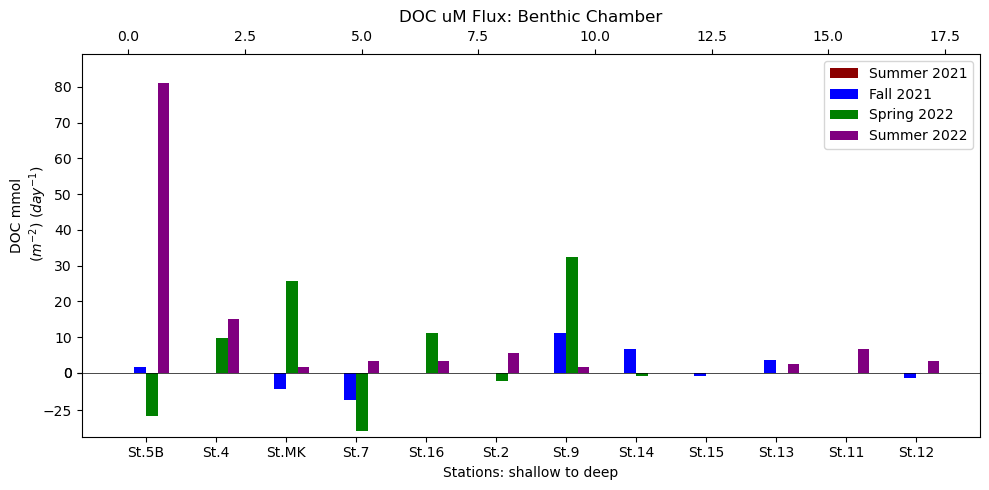

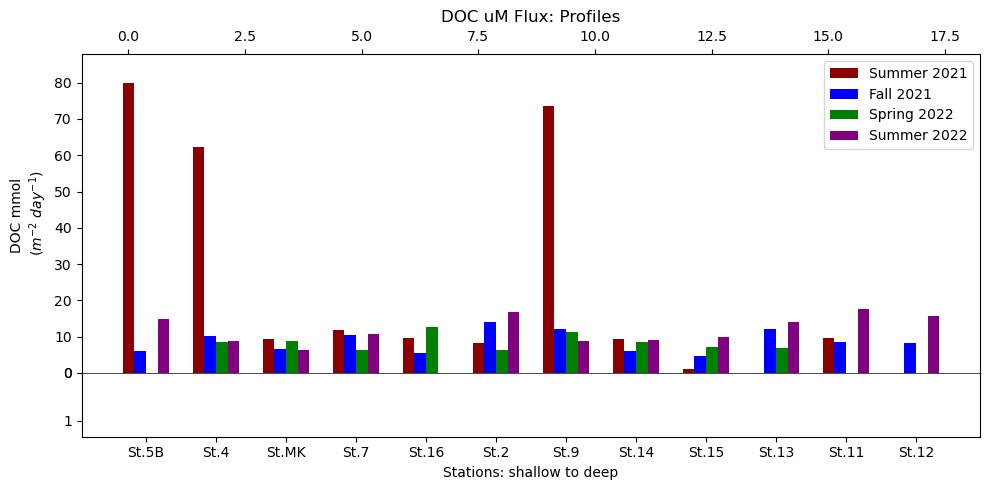

In [9]:
ylabes = r'DOC mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'DOC uM Flux: Benthic Chamber'
data_f = flux_doc_bc
flux_col = "bc_flux_doc"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 


ylabes = r'DOC mmol '+'\n'+r'$(m^{-2}$ $day^{-1})$'
tlabes = 'DOC uM Flux: Profiles'
data_f = flux_doc_pw
flux_col = "pw_flux_doc"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 




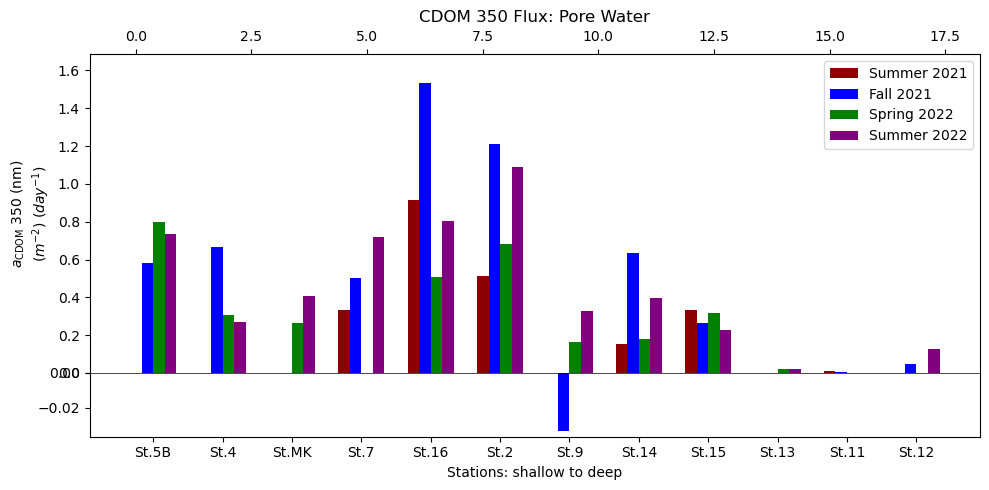

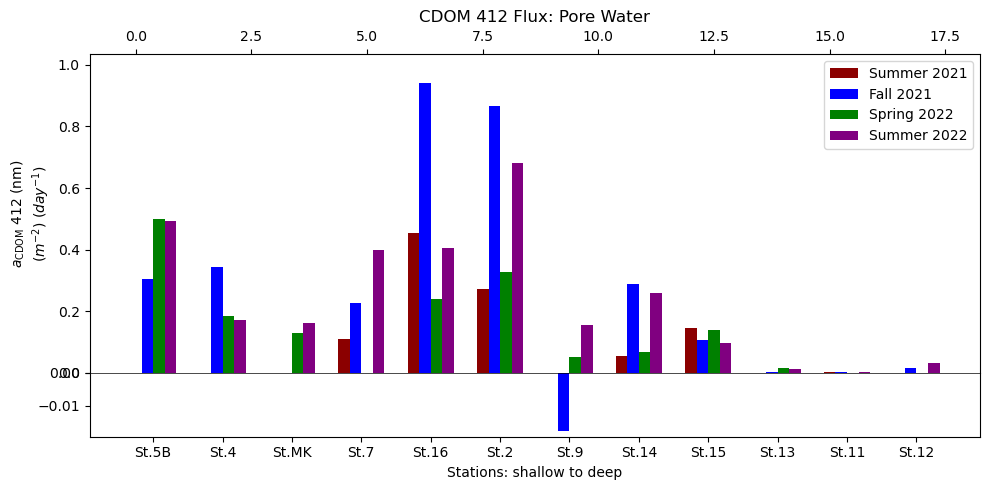

In [10]:
ylabes = r'$a_{\mathrm{CDOM}}$ 350 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'CDOM 350 Flux: Pore Water'
data_f = df
flux_col = "pw_flux_aCDOM350"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 

ylabes = r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'CDOM 412 Flux: Pore Water'
data_f = df
flux_col = "pw_flux_aCDOM412"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 




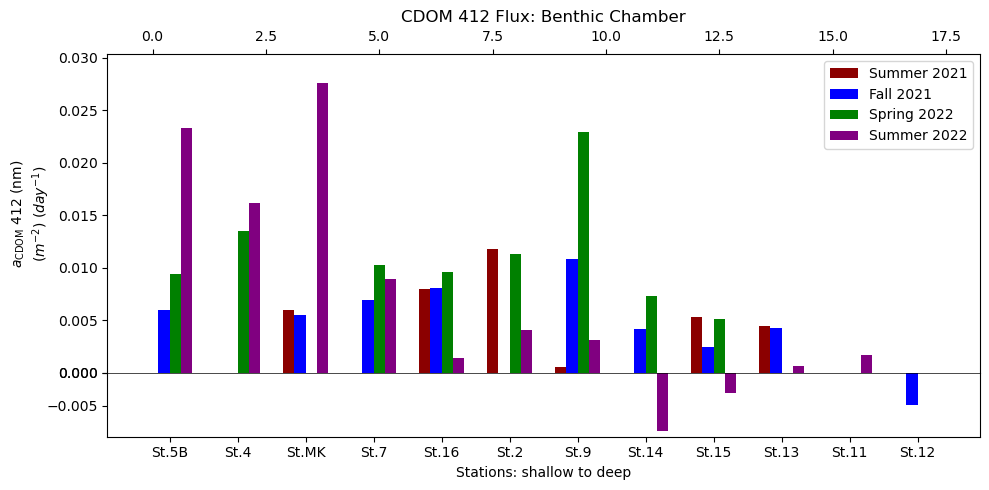

In [11]:
ylabes = r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'CDOM 412 Flux: Benthic Chamber'
data_f = flux_cdom_bc_412
flux_col = "bc_flux_aCDOM412"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 




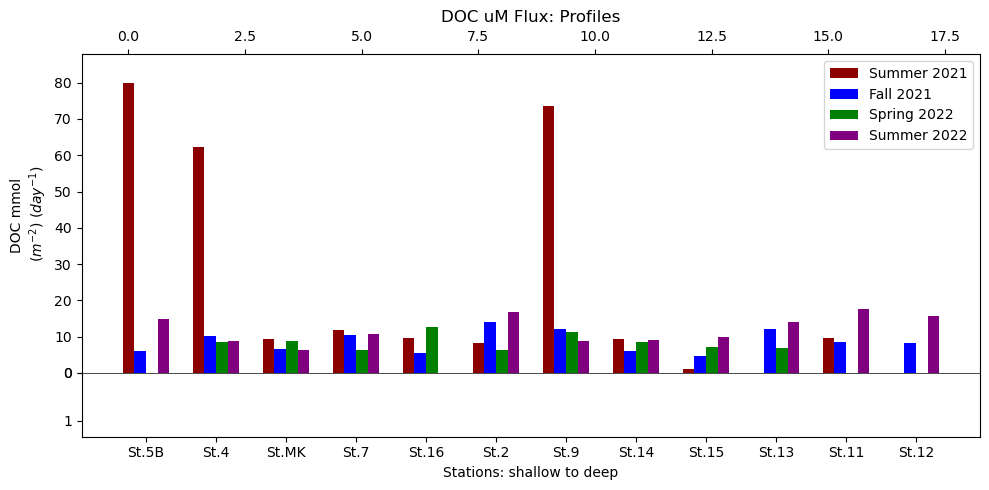

In [12]:
ylabes = r'DOC mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'DOC uM Flux: Profiles'
data_f = flux_doc_pw
flux_col = "pw_flux_doc"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 

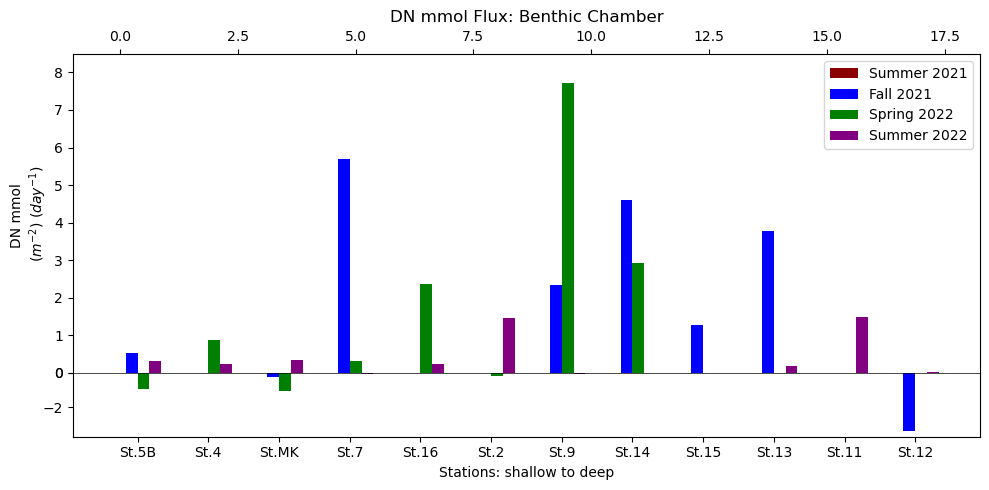

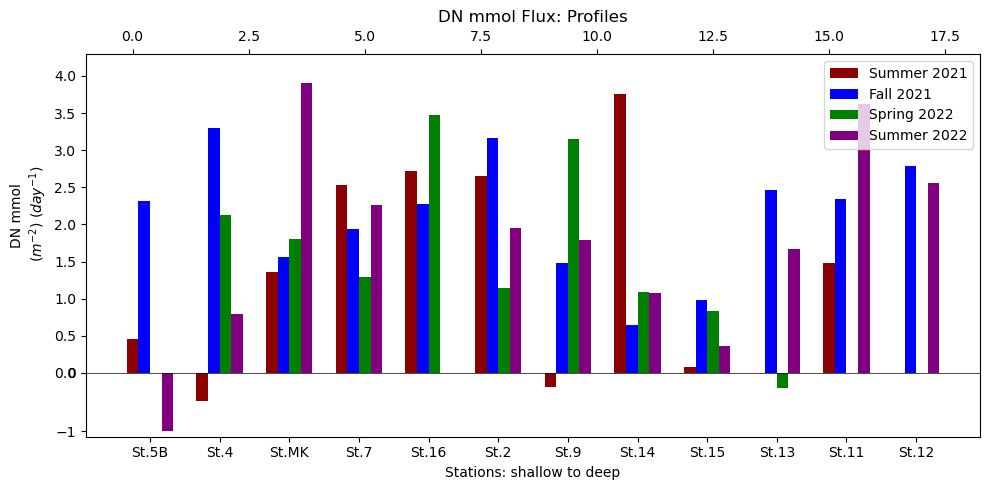

In [13]:
ylabes = r'DN mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'DN mmol Flux: Benthic Chamber'
data_f = flux_tn_bc
flux_col = "bc_flux_tn"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 

ylabes = r'DN mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'DN mmol Flux: Profiles'
data_f = flux_tn_pw
flux_col = "pw_flux_tn"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 




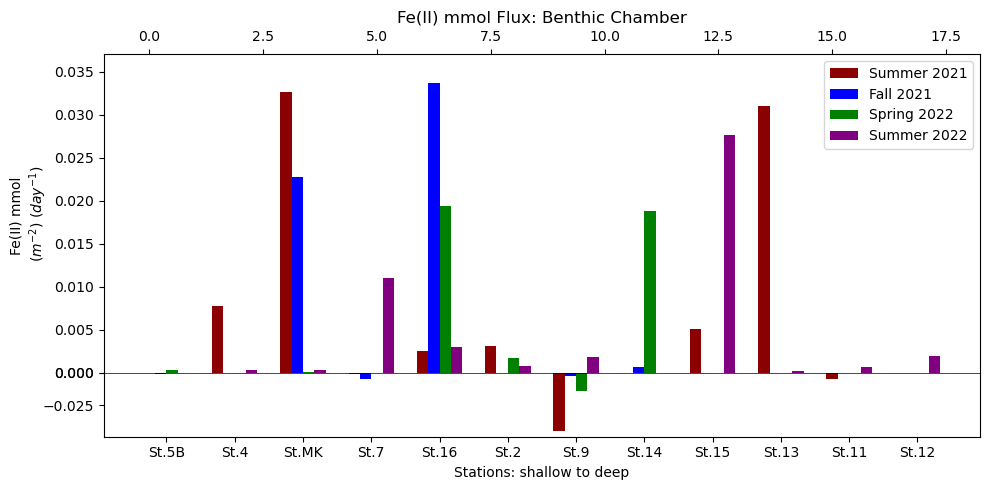

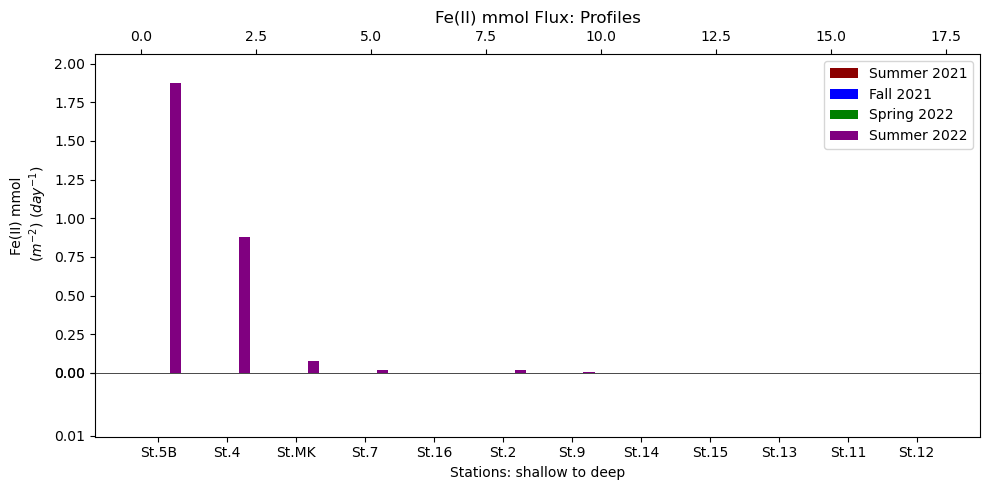

In [14]:
ylabes = r'Fe(II) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'Fe(II) mmol Flux: Benthic Chamber'
data_f = flux_fe2_bc
flux_col = "bc_flux_fe2"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 


ylabes = r'Fe(II) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'Fe(II) mmol Flux: Profiles'
data_f = flux_fe2_pw
flux_col = "pw_flux_fe2"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 


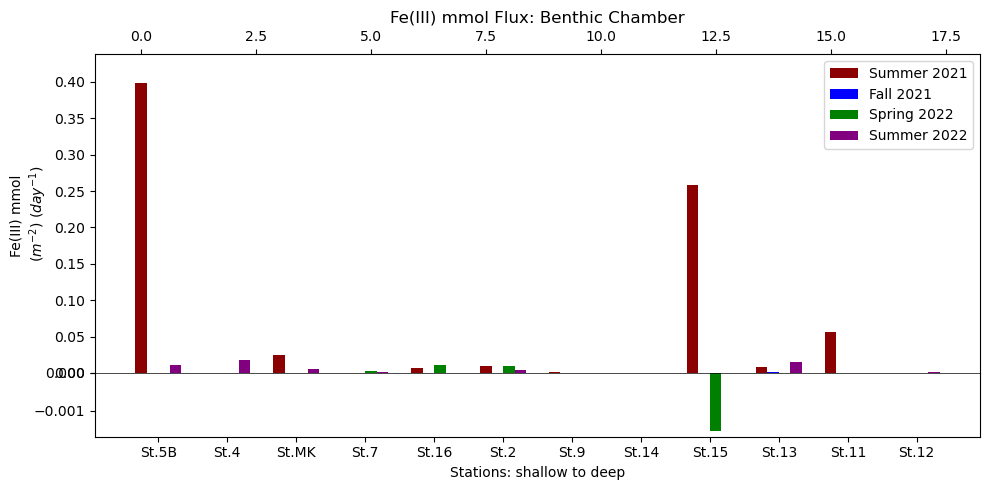

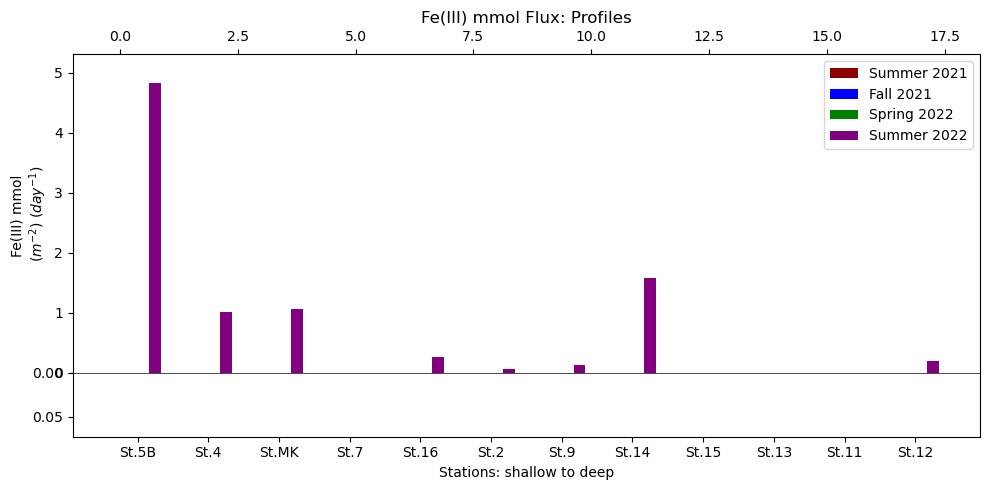

In [15]:
ylabes = r'Fe(III) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'Fe(III) mmol Flux: Benthic Chamber'
data_f = flux_fe3_bc
flux_col = "bc_flux_fe3"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 


ylabes = r'Fe(III) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
tlabes = 'Fe(III) mmol Flux: Profiles'
data_f = flux_fe3_pw
flux_col = "pw_flux_fe3"

bar_plot_stn_camp(data_f, flux_col, ylabes, tlabes) 


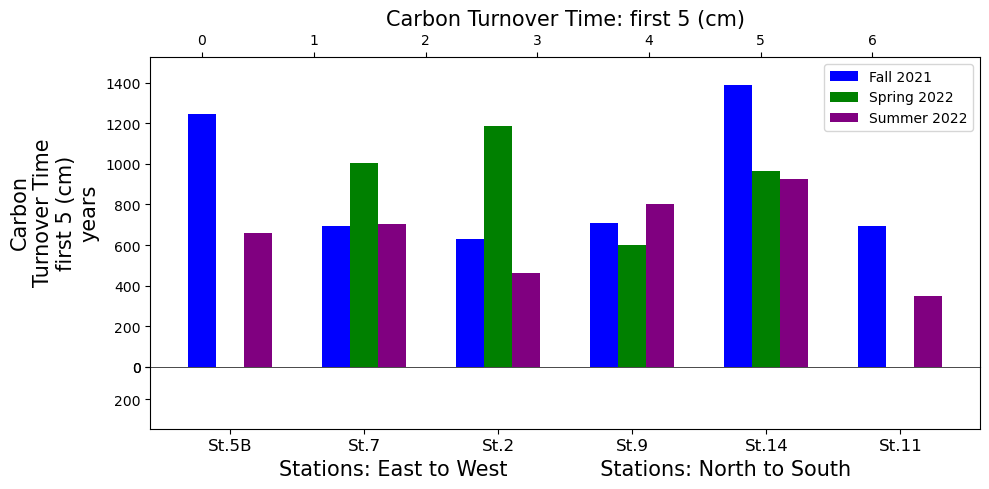

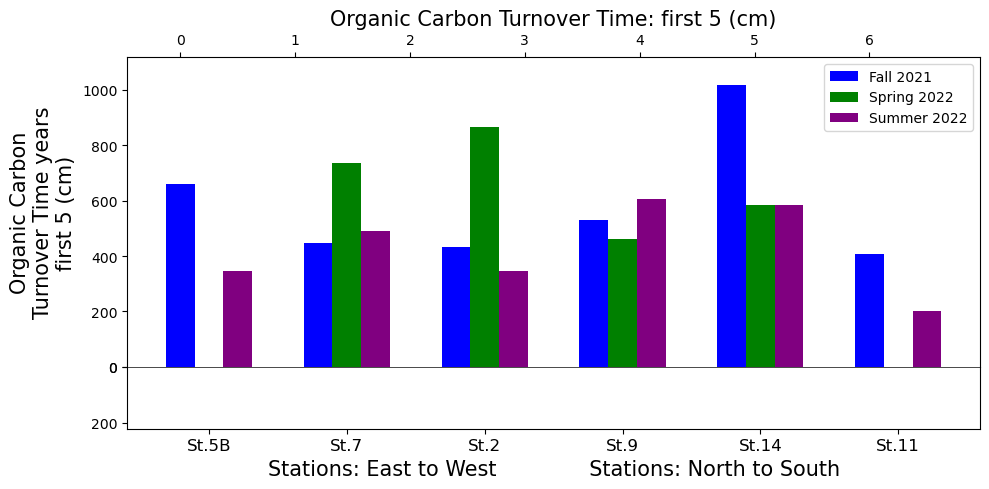

In [16]:
df['tt_y_C'] = (df['Cg_5cm_deep/M2']/12.011) / (df['pw_flux_doc'] * 365 / 1000)

df['tt_y_OC'] = (df['OCg_5cm_deep/M2']/12.011) / (df['pw_flux_doc'] * 365 / 1000)

categories = ['St.5B','St.7','St.2','St.9','St.14','St.11']
subcategories = ['GOM21FA', 'GOM22SP', 'GOM22SU']

def bar_plot_stock(data_f, flux_col, ylabes, tlabes): 
    df = data_f.dropna(subset=[flux_col])

    # Define custom colors
    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0)  # Set hspace to 0

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.2, 1.2)
    positions = [r + i*barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            #error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)]['erros_doc'].values
            values.append(value[0] if len(value) > 0 else 0)
            #errors.append(error[0] if len(error) > 0 else 0)
    
        ax1.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
        ax2.bar(pos, [v if v < 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
    
    ax1.set_ylim(0, df[flux_col].max()*1.1)  
    ax2.set_ylim(df[flux_col].min()*1.1, 0)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop='off')
    ax2.xaxis.tick_bottom()

    # Add some text for labels, title, and custom x-axis tick labels
    ax2.set_xlabel('Stations: East to West              Stations: North to South', size = 15)
    ax1.set_ylabel(ylabes, size = 15)
    ax1.set_title(tlabes, size = 15)
    ax2.set_xticks(r + 1*barWidth)  # Adjust for the spaces between groups
    ax2.set_xticklabels(categories, size = 12)

    # Add black horizontal line at y=0
    ax1.axhline(0, color="black", linewidth=0.5)
    ax2.axhline(0, color="black", linewidth=0.5)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax1.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.show()

ylabes = r'Carbon'+'\n'+'Turnover Time'+'\n'+ 'first 5 (cm)'+'\n'+r'years'
tlabes = 'Carbon Turnover Time: first 5 (cm)'
data_f = df
flux_col = "tt_y_C"

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 


ylabes = r'Organic Carbon'+'\n'+'Turnover Time years'+'\n'+ 'first 5 (cm)'
tlabes = 'Organic Carbon Turnover Time: first 5 (cm)'
data_f = df
flux_col = "tt_y_OC"

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 


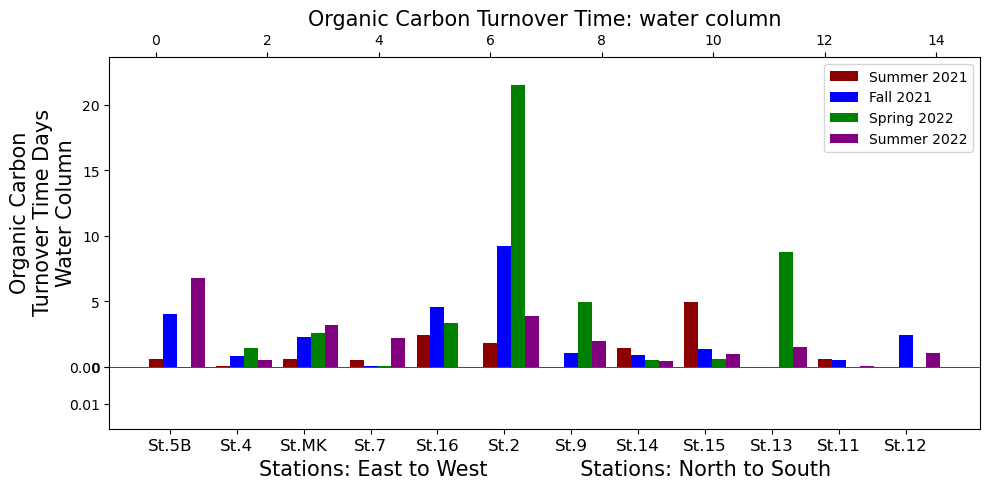

In [17]:
df['tt_y_doc'] = (df['NPOC_uMol_Stock_wc']/1000) / (df['pw_flux_doc'] * 365 )

categories = ['St.5B','St.4','St.MK','St.7','St.16','St.2','St.9','St.14','St.15','St.13','St.11','St.12']
subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

ylabes = r'Organic Carbon'+'\n'+'Turnover Time Days'+'\n'+ 'Water Column'
tlabes = 'Organic Carbon Turnover Time: water column'
data_f = df
flux_col = "tt_y_doc"

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 


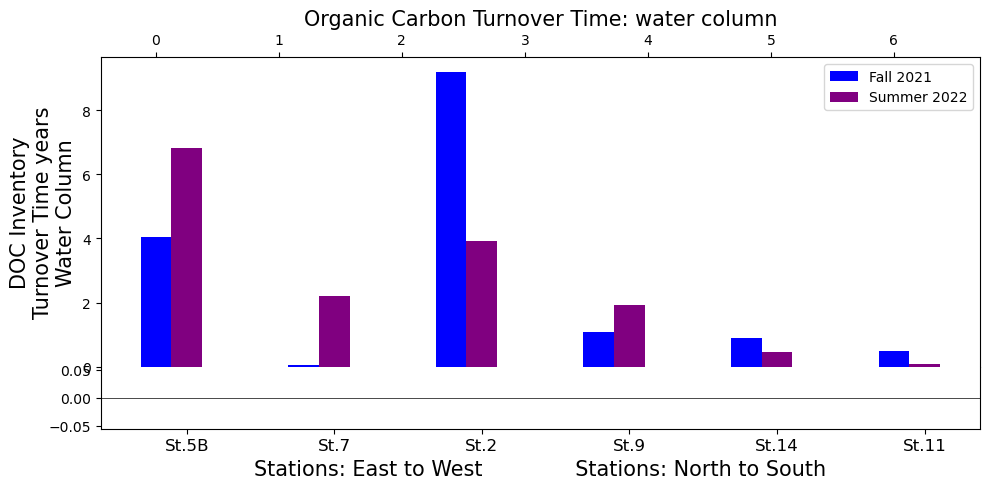

In [18]:
def bar_plot_stock(data_f, flux_col, ylabes, tlabes): 
    df = data_f.dropna(subset=[flux_col])

    # Define custom colors
    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0)  # Set hspace to 0

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.2, 1.2)
    positions = [r + i*barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            #error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)]['erros_doc'].values
            values.append(value[0] if len(value) > 0 else 0)
            #errors.append(error[0] if len(error) > 0 else 0)
    
        ax1.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
        ax2.bar(pos, [v if v < 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
    
    #ax1.set_ylim(0, 130)  
    #ax2.set_ylim(-10, 0)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop='off')
    ax2.xaxis.tick_bottom()

    # Add some text for labels, title, and custom x-axis tick labels
    ax2.set_xlabel('Stations: East to West              Stations: North to South', size = 15)
    ax1.set_ylabel(ylabes, size = 15)
    ax1.set_title(tlabes, size = 15)
    ax2.set_xticks(r + 1*barWidth)  # Adjust for the spaces between groups
    ax2.set_xticklabels(categories, size = 12)

    # Add black horizontal line at y=0
    ax1.axhline(0, color="black", linewidth=0.5)
    ax2.axhline(0, color="black", linewidth=0.5)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax1.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.show()

df['tt_y_doc'] = (df['NPOC_uMol_Stock_wc']/1000) / (df['pw_flux_doc'] * 365)

categories = ['St.5B','St.7','St.2','St.9','St.14','St.11']
subcategories = ['GOM21FA','GOM22SU']

ylabes = r'DOC Inventory'+'\n'+'Turnover Time years'+'\n'+ 'Water Column'
tlabes = 'Organic Carbon Turnover Time: water column'
data_f = df
flux_col = "tt_y_doc"

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 


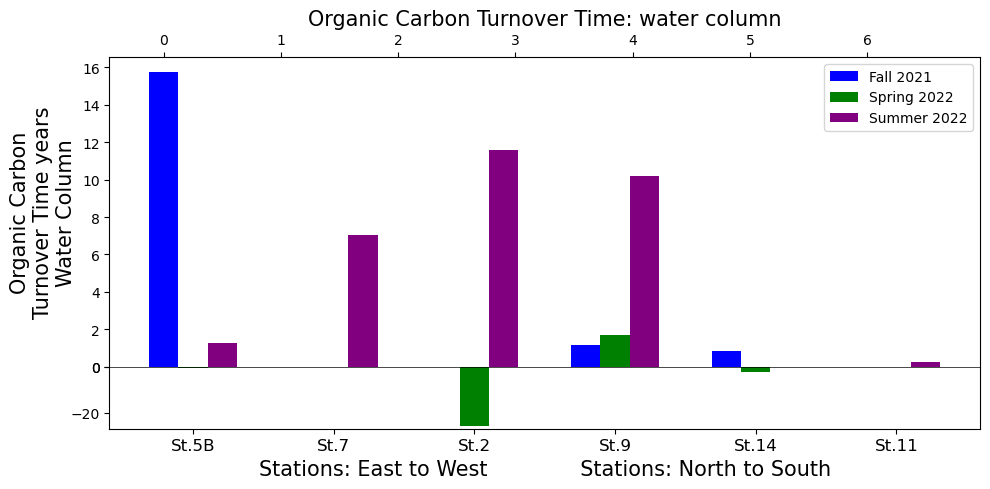

In [19]:
def bar_plot_stock(data_f, flux_col, ylabes, tlabes): 
    df = data_f.dropna(subset=[flux_col])

    # Define custom colors
    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0)  # Set hspace to 0

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.2, 1.2)
    positions = [r + i*barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            #error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)]['erros_doc'].values
            values.append(value[0] if len(value) > 0 else 0)
            #errors.append(error[0] if len(error) > 0 else 0)
    
        ax1.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
        ax2.bar(pos, [v if v < 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
    
    #ax1.set_ylim(0, 130)  
    #ax2.set_ylim(-10, 0)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop='off')
    ax2.xaxis.tick_bottom()

    # Add some text for labels, title, and custom x-axis tick labels
    ax2.set_xlabel('Stations: East to West              Stations: North to South', size = 15)
    ax1.set_ylabel(ylabes, size = 15)
    ax1.set_title(tlabes, size = 15)
    ax2.set_xticks(r + 1*barWidth)  # Adjust for the spaces between groups
    ax2.set_xticklabels(categories, size = 12)

    # Add black horizontal line at y=0
    ax1.axhline(0, color="black", linewidth=0.5)
    ax2.axhline(0, color="black", linewidth=0.5)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax1.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.show()

df['tt_y_doc_bc'] = (df['NPOC_uMol_Stock_wc']/1000) / (df['bc_flux_doc'] * 365)

categories = ['St.5B','St.7','St.2','St.9','St.14','St.11']
subcategories = ['GOM21FA','GOM22SP','GOM22SU']

ylabes = r'Organic Carbon'+'\n'+'Turnover Time years'+'\n'+ 'Water Column'
tlabes = 'Organic Carbon Turnover Time: water column'
data_f = df
flux_col = "tt_y_doc_bc"

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 


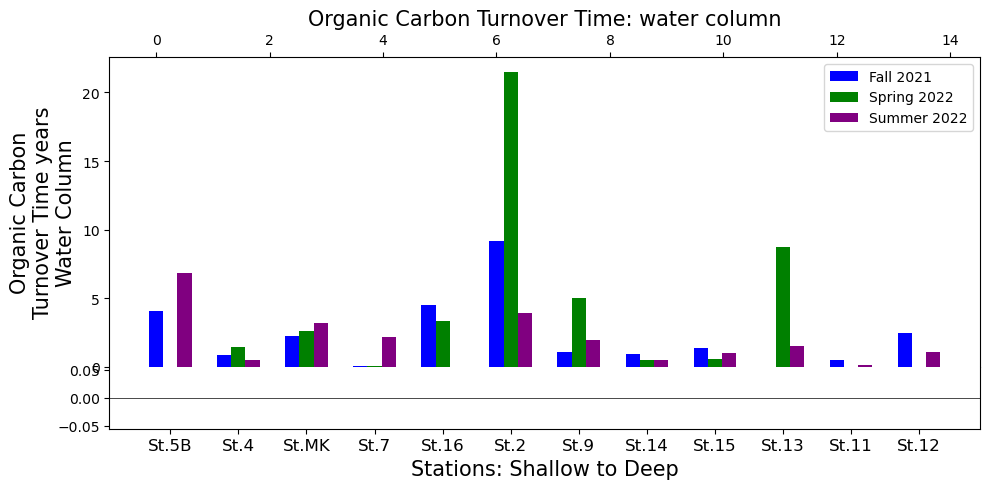

In [20]:
def bar_plot_stock(data_f, flux_col, ylabes, tlabes): 
    df = data_f.dropna(subset=[flux_col])

    # Define custom colors
    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0)  # Set hspace to 0

    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.2, 1.2)
    positions = [r + i*barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            #error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)]['erros_doc'].values
            values.append(value[0] if len(value) > 0 else 0)
            #errors.append(error[0] if len(error) > 0 else 0)
    
        ax1.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
        ax2.bar(pos, [v if v < 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
    
    #ax1.set_ylim(0, 130)  
    #ax2.set_ylim(-10, 0)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop='off')
    ax2.xaxis.tick_bottom()

    # Add some text for labels, title, and custom x-axis tick labels
    ax2.set_xlabel('Stations: Shallow to Deep', size = 15)
    ax1.set_ylabel(ylabes, size = 15)
    ax1.set_title(tlabes, size = 15)
    ax2.set_xticks(r + 1*barWidth)  # Adjust for the spaces between groups
    ax2.set_xticklabels(categories, size = 12)

    # Add black horizontal line at y=0
    ax1.axhline(0, color="black", linewidth=0.5)
    ax2.axhline(0, color="black", linewidth=0.5)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax1.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.show()

categories = ['St.5B','St.4','St.MK','St.7','St.16','St.2','St.9','St.14','St.15','St.13','St.11','St.12']
subcategories = ['GOM21FA','GOM22SP','GOM22SU']

ylabes = r'Organic Carbon'+'\n'+'Turnover Time years'+'\n'+ 'Water Column'
tlabes = 'Organic Carbon Turnover Time: water column'
data_f = df
flux_col = "tt_y_doc"

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 


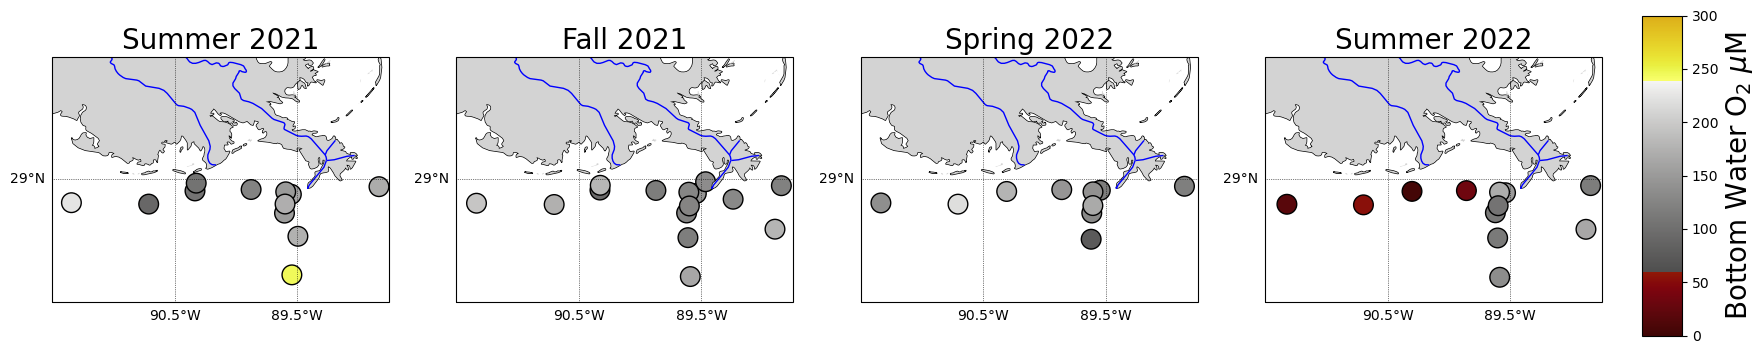

In [21]:
lat_top=30
lat_bot=28
lon_left=-91.5
lon_rigth=-88.75
extent=[lon_left, lon_rigth, lat_bot, lat_top]

# set resolution of the features in map: '10m', '50m', or '110m'.  
# If you do this the first time it will take a while downloading the coastline 
# and other features. In the future it will be faster
res = '10m'

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='lightgrey', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

def map_O2(data_f, topic, cb_name):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=cmo.oxy,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=300,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    
data_f = df_o2
topic = 'O2_uM_bottom'
cb_name = r'Bottom Water O$_2$ $\mu$M'
map_O2(data_f, topic, cb_name)
plot_save = "../Dissertation_projects/Figures/Flux_figures/O2_map.png"


In [22]:
def map_stocks(data_f, topic, cb_name, grad):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['Camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['Lon'], df_subset['Lat'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=grad,
                                   s=200,
                                   vmin=df_subset[topic].min()*1.1,  # Set global min and max for colormap
                                   vmax=df_subset[topic].max()*1.1,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()

In [23]:
def map_stocks_2(data_f, topic, cb_name, grad):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['Camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['Lon'], df_subset['Lat'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=grad,
                                   s=200,
                                   vmin=-df_subset[topic].max()*1.1,  # Set global min and max for colormap
                                   vmax=df_subset[topic].max()*1.1,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()

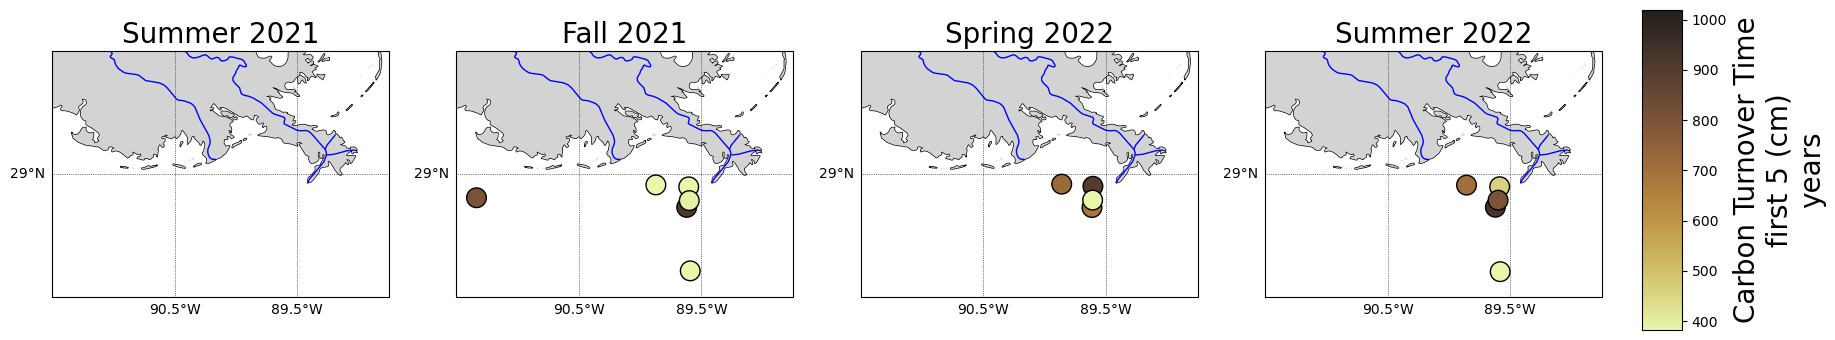

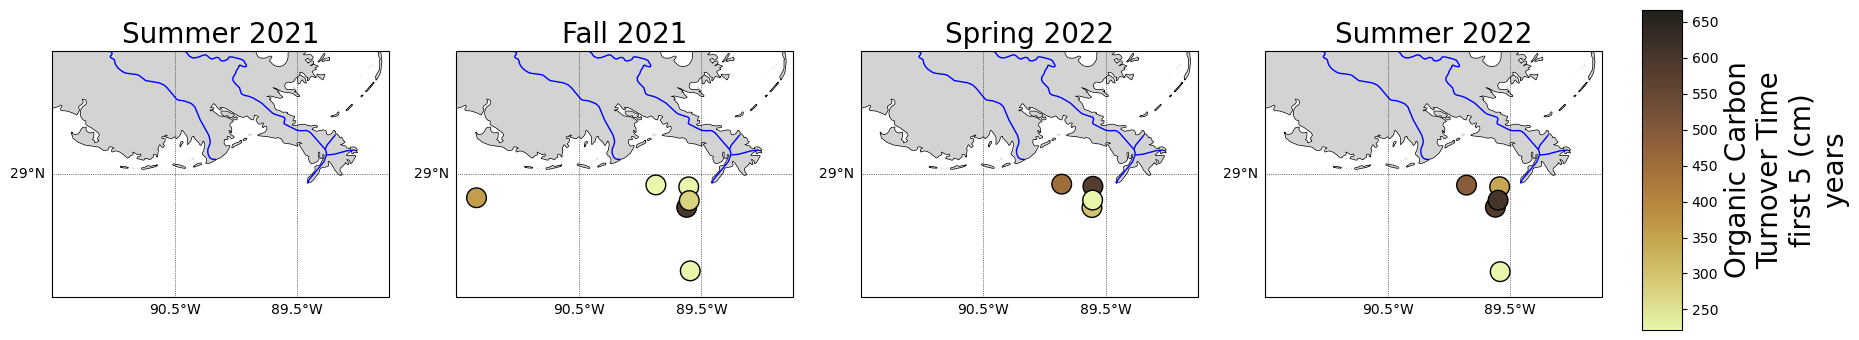

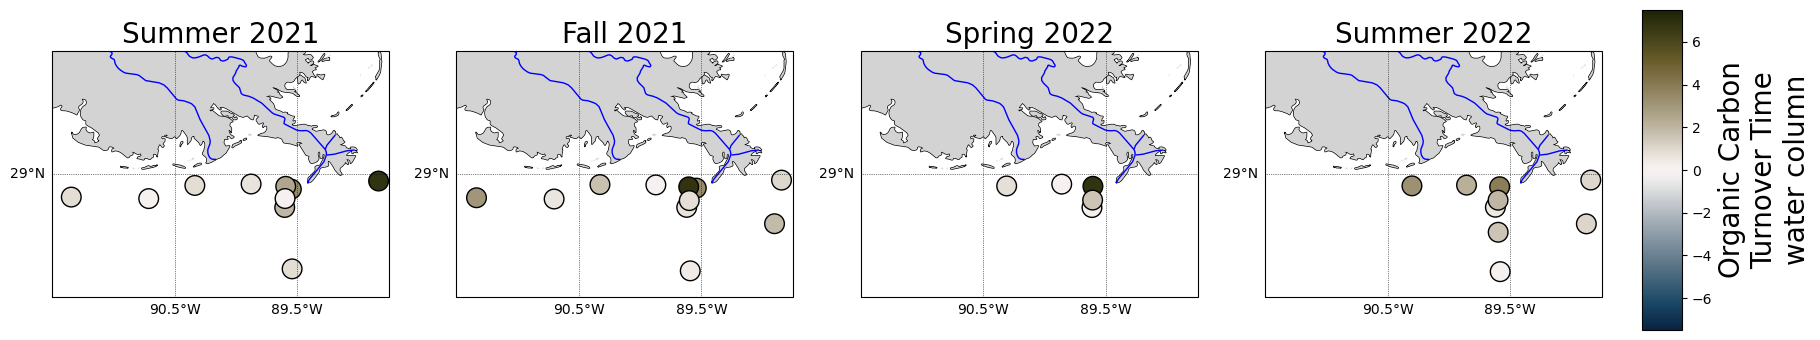

In [24]:
#set params
data_f = df
topic = "tt_y_C"
cb_name = r'Carbon Turnover Time'+'\n'+ 'first 5 (cm)'+'\n'+r'years'
grad = cmo.turbid
map_stocks(data_f, topic, cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/tunover_C_map.png"

#set params
data_f = df
topic = "tt_y_OC"
cb_name = r'Organic Carbon'+'\n'+'Turnover Time'+'\n'+ 'first 5 (cm)'+'\n'+r'years'
grad = cmo.turbid
map_stocks(data_f, topic, cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/tunover_OC_map.png"

data_f = df
cb_name = f'Organic Carbon'+'\n'+'Turnover Time'+'\n'+'water column'
topic = "tt_y_doc"
grad = cmo.diff
map_stocks_2(data_f, topic, cb_name, grad)


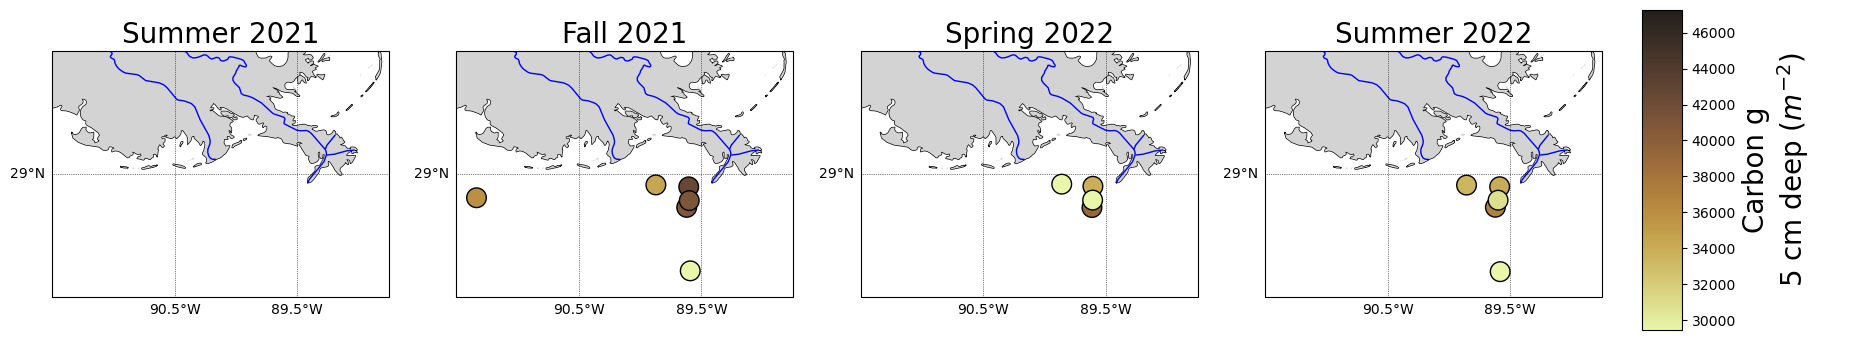

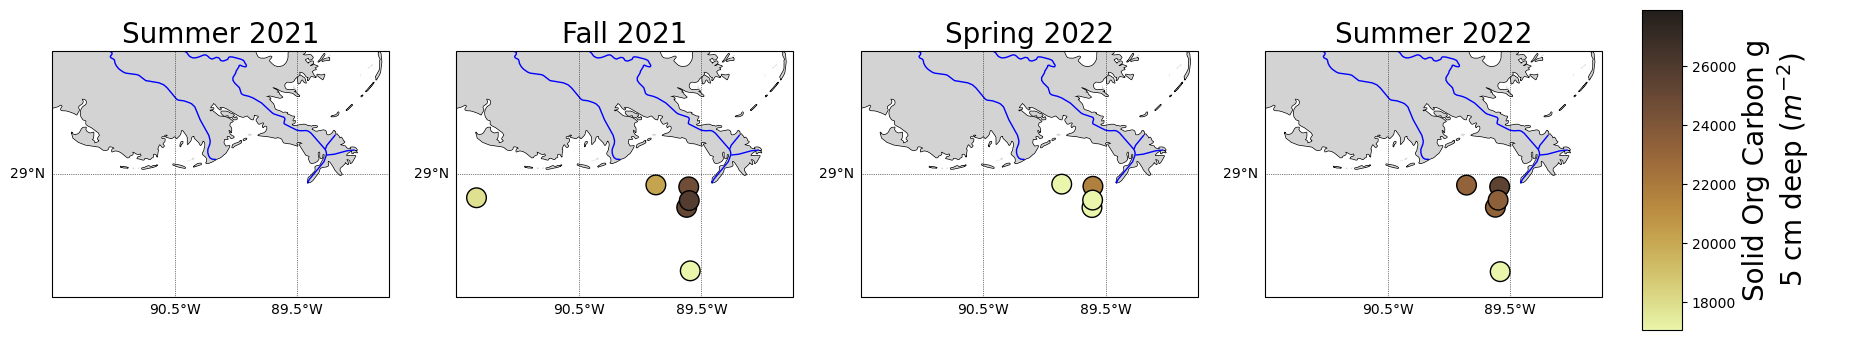

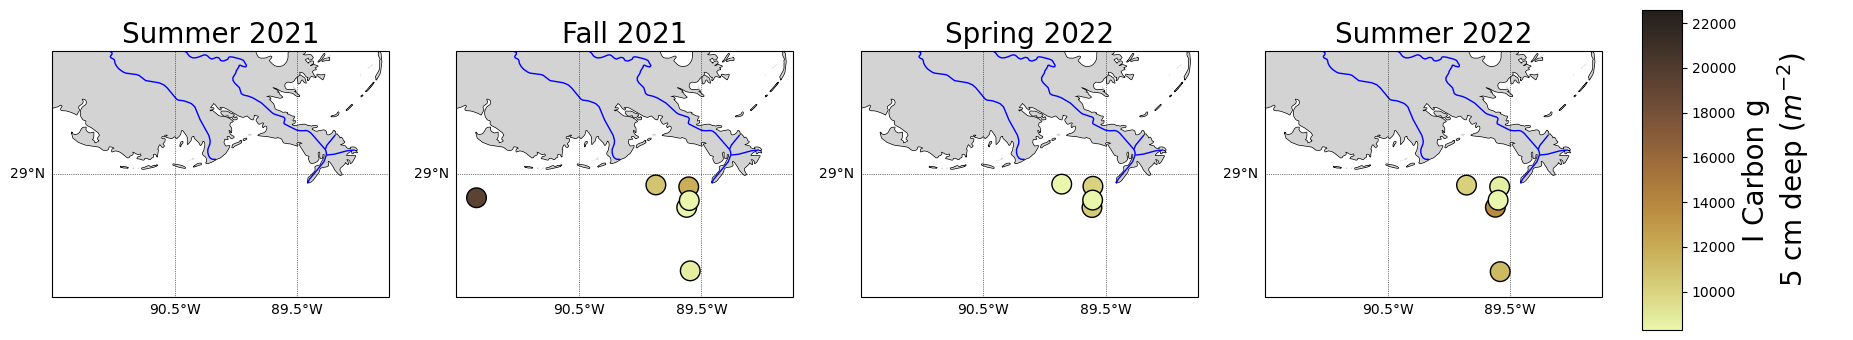

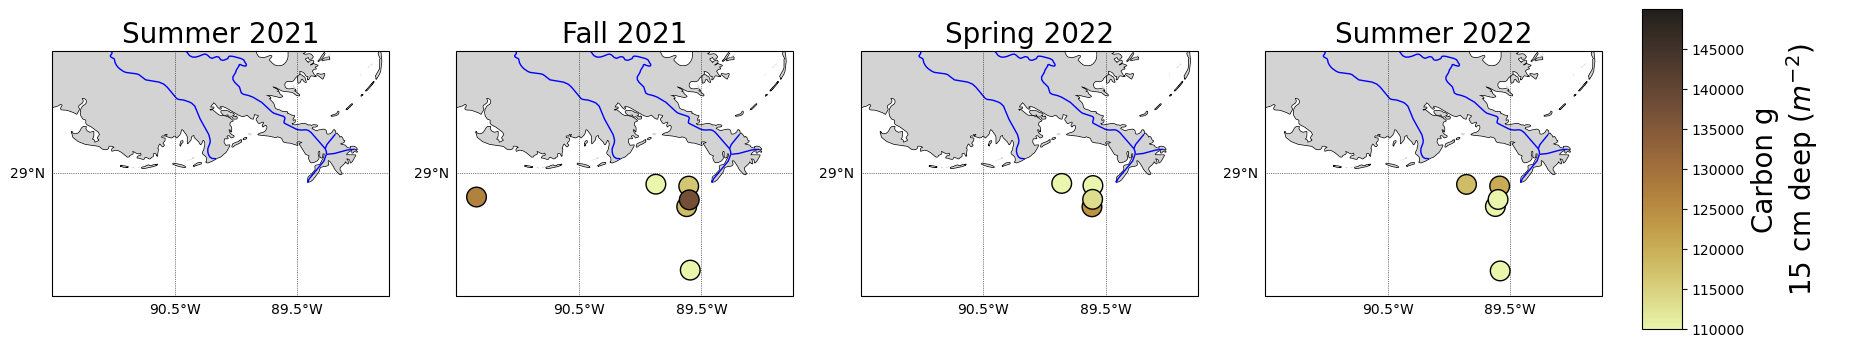

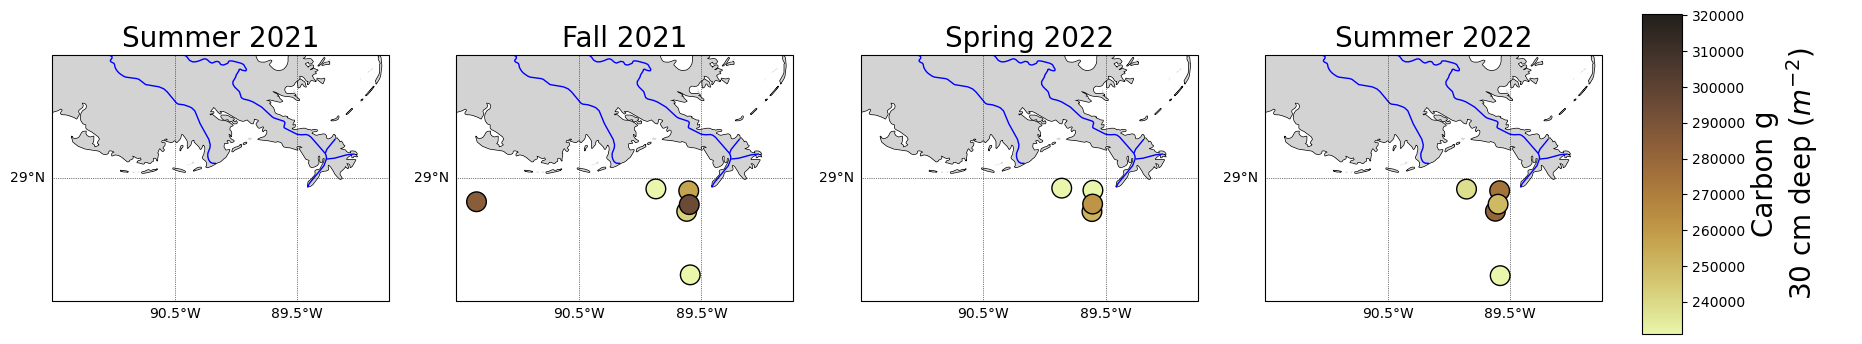

In [25]:
#set params
data_f = df
topic = "Cg_5cm_deep/M2"
cb_name = r'Carbon g'+'\n'+r'5 cm deep $(m^{-2})$'+'\n'
grad = cmo.turbid
map_stocks(data_f, topic, cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/stock_C_map.png"

#set params
data_f = df
topic = "OCg_5cm_deep/M2"
cb_name = r'Solid Org Carbon g'+'\n'+r'5 cm deep $(m^{-2})$'+'\n'
grad = cmo.turbid
map_stocks(data_f, topic, cb_name, grad)

#set params
data_f = df
topic = "ICg_5cm_deep/M2"
cb_name = r'I Carbon g'+'\n'+r'5 cm deep $(m^{-2})$'+'\n'
grad = cmo.turbid
map_stocks(data_f, topic, cb_name, grad)

data_f = df
topic = "Cg_15cm_deep/M2"
cb_name = r'Carbon g'+'\n'+r'15 cm deep $(m^{-2})$'+'\n'
grad = cmo.turbid
map_stocks(data_f, topic, cb_name, grad)

data_f = df
topic = "Cg_30cm_deep/M2"
cb_name = r'Carbon g'+'\n'+r'30 cm deep $(m^{-2})$'+'\n'
grad = cmo.turbid
map_stocks(data_f, topic, cb_name, grad)

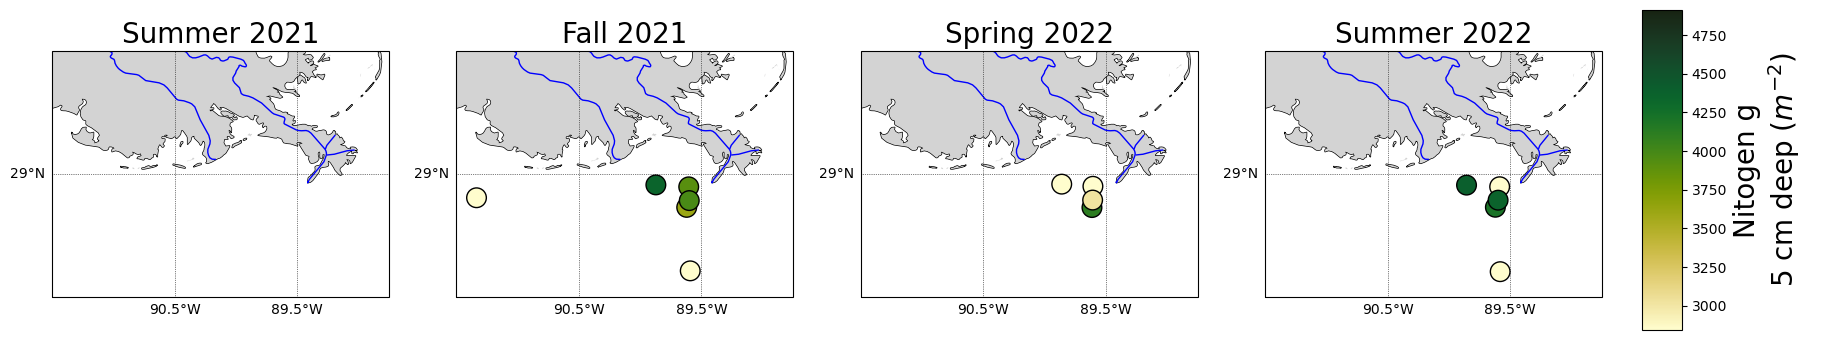

In [26]:
#set params
data_f = df
topic = "Ng_5cm_deep/M2"
cb_name = r'Nitogen g'+'\n'+r'5 cm deep $(m^{-2})$'+'\n'
grad = cmo.speed
map_stocks(data_f, topic, cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/stock_N_map.png"


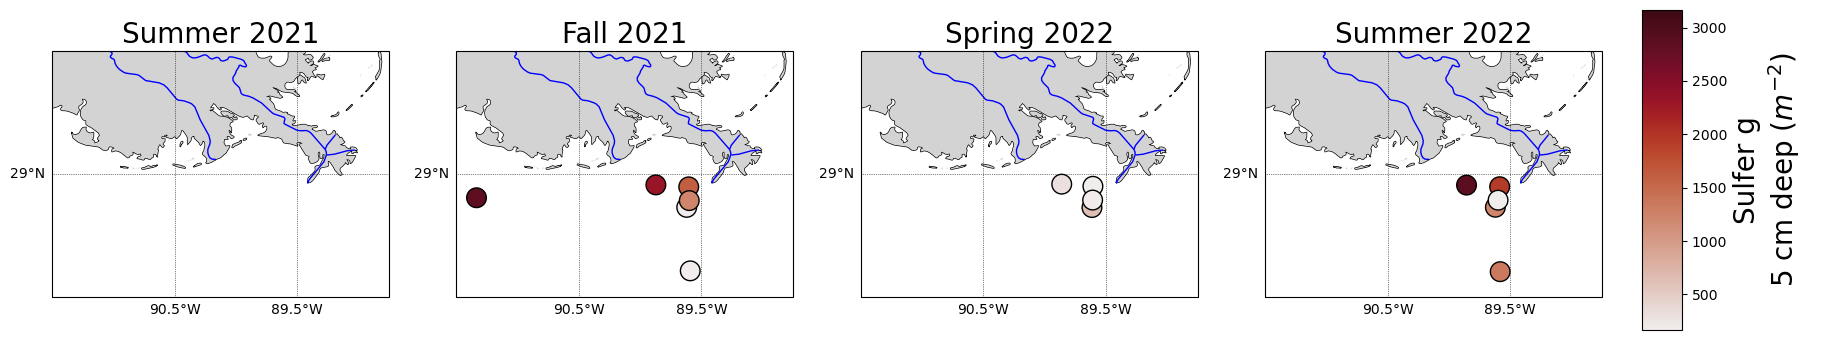

In [27]:
#set params
data_f = df
topic = "Sg_5cm_deep/M2"
cb_name = r'Sulfer g'+'\n'+r'5 cm deep $(m^{-2})$'+'\n'
grad = cmo.amp
map_stocks(data_f, topic, cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/stock_S_map.png"


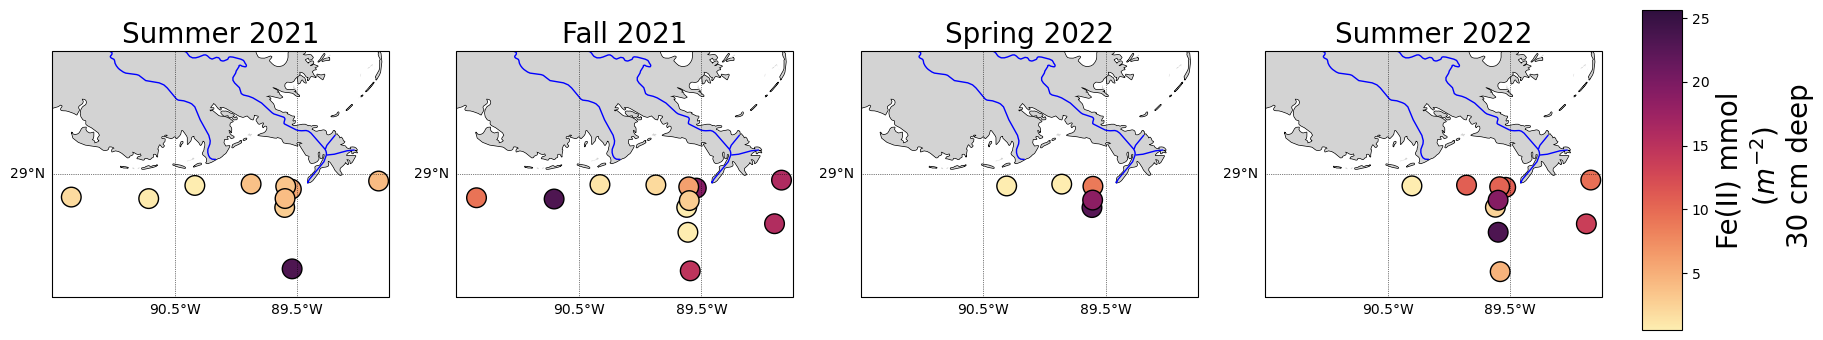

In [28]:
data_f = df
topic = "Fe2/m2"
cb_name = r'Fe(II) mmol'+'\n'+r' $(m^{-2})$'+'\n 30 cm deep'
grad = cmo.matter
map_stocks(data_f, topic, cb_name, grad)


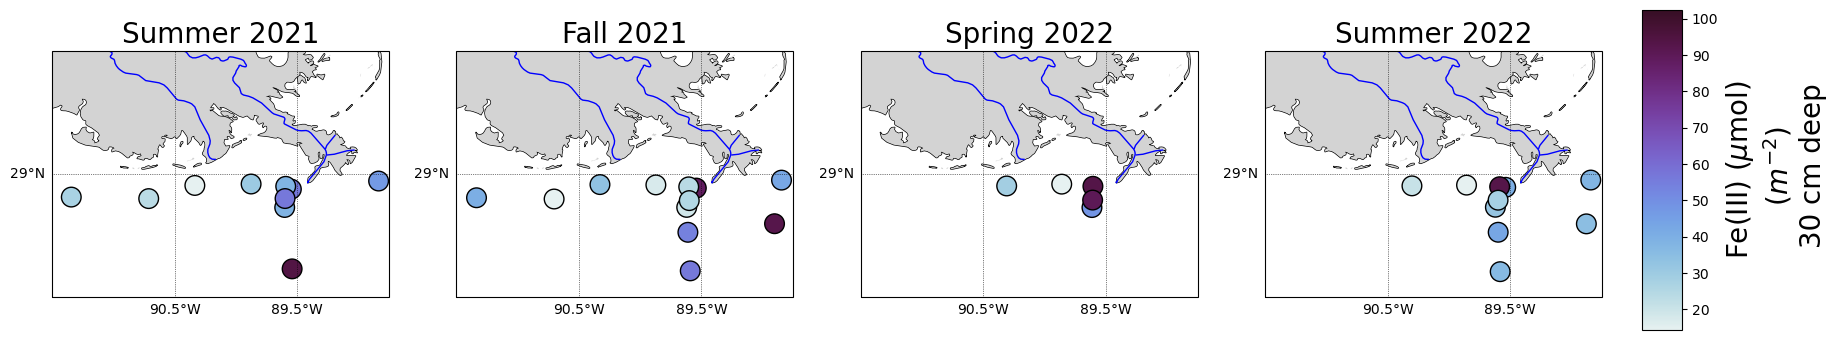

In [29]:
data_f = df
topic = "Fe3/m2"
cb_name = r'Fe(III) ($\mu$mol)'+'\n'+r' $(m^{-2})$'+'\n 30 cm deep'
grad = cmo.dense
map_stocks(data_f, topic, cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/stock_Fe3_map.png"


In [30]:
def map_fluxes(data_f, topic,cb_name, grad):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['Camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['Lon'], df_subset['Lat'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=grad,
                                   s=200,
                                   vmin=df_subset[topic].max()*-1.1,  # Set global min and max for colormap
                                   vmax=df_subset[topic].max()*1.1,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()

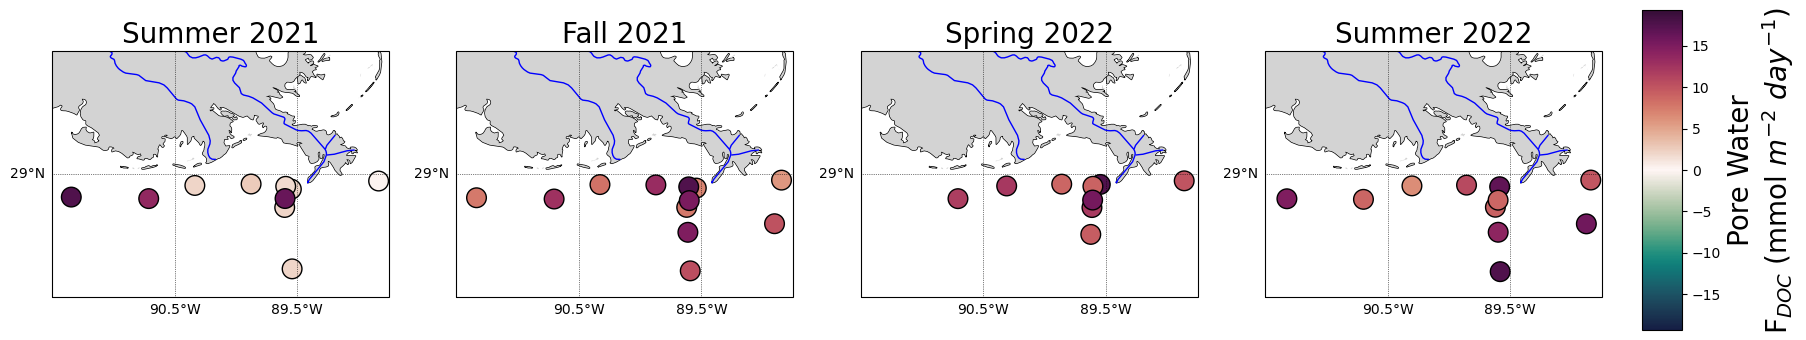

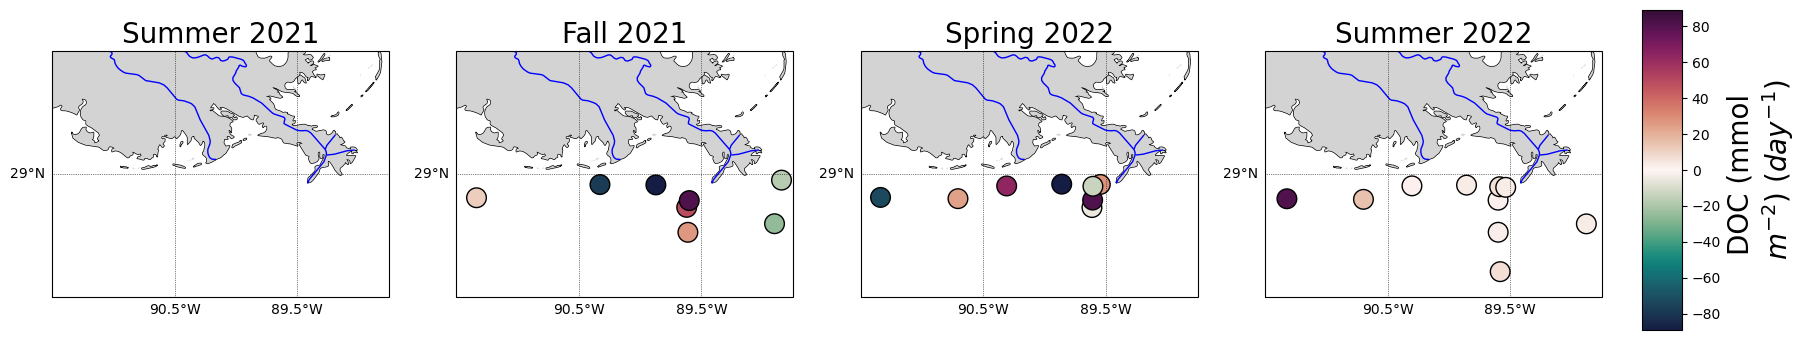

In [31]:
#set params 
data_f = flux_doc_pw
topic = "pw_flux_doc"
cb_name = r'Pore Water'+'\n'+r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'
grad = cmo.curl
map_fluxes(data_f, topic,cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_doc_pw_map.png"


#set params 
data_f = flux_doc_bc
topic = "bc_flux_doc"
cb_name = r'DOC (mmol '+'\n'+r'$m^{-2})$ $(day^{-1})$'
grad = cmo.curl
map_fluxes(data_f, topic,cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_doc_bc_map.png"


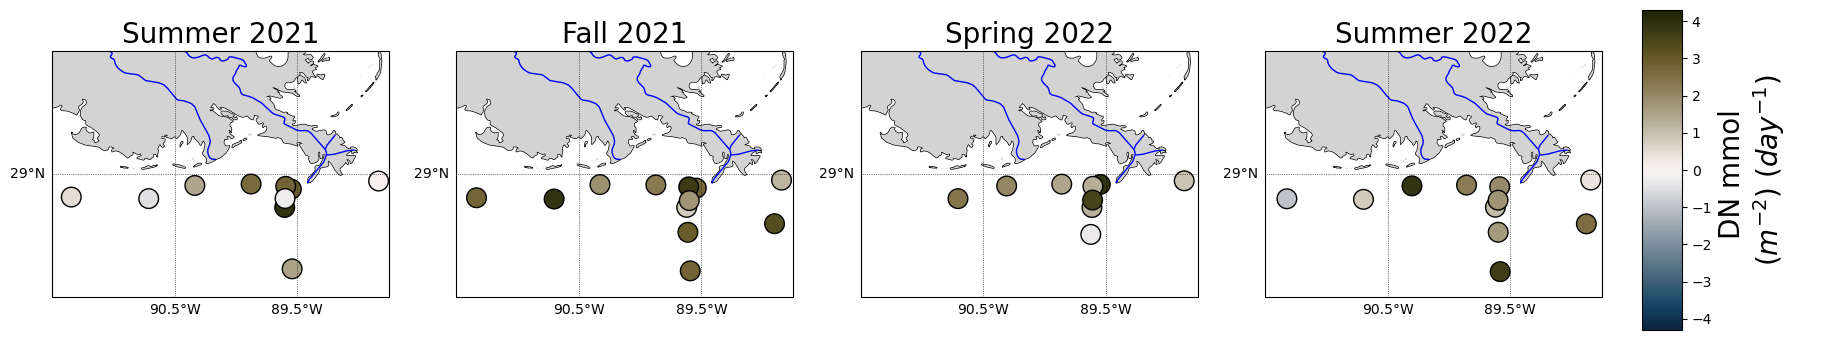

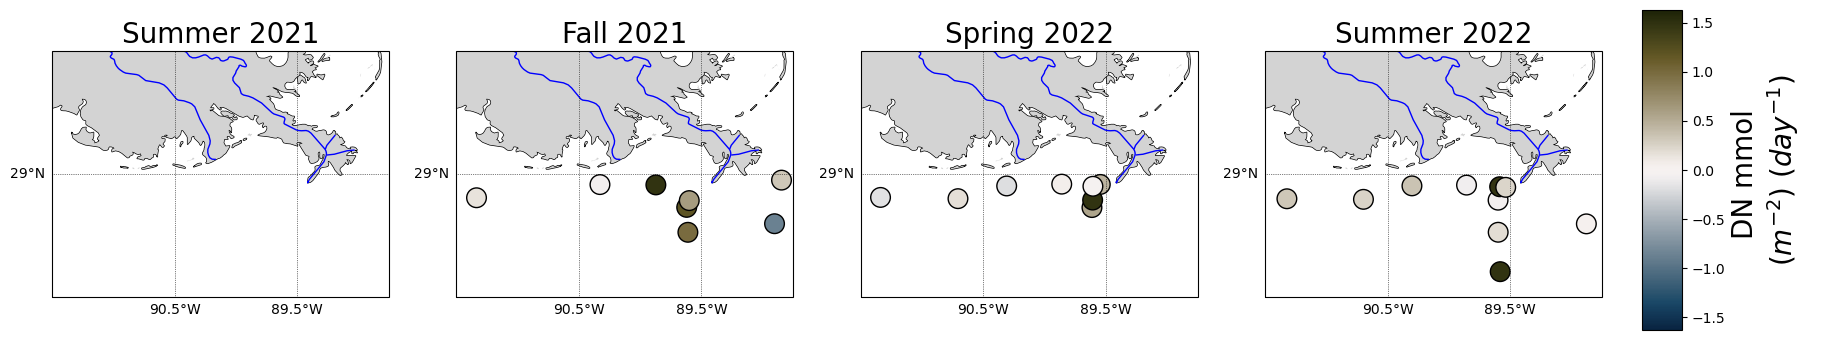

In [32]:
#set params 
data_f = flux_tn_pw
topic = "pw_flux_tn"
cb_name = r'DN mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'
grad = cmo.diff
map_fluxes(data_f, topic,cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_dn_pw_map.png"

#set params 
data_f = flux_tn_bc
topic = "bc_flux_tn"
cb_name = r'DN mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'
grad = cmo.diff
map_fluxes(data_f, topic,cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_dn_bc_map.png"


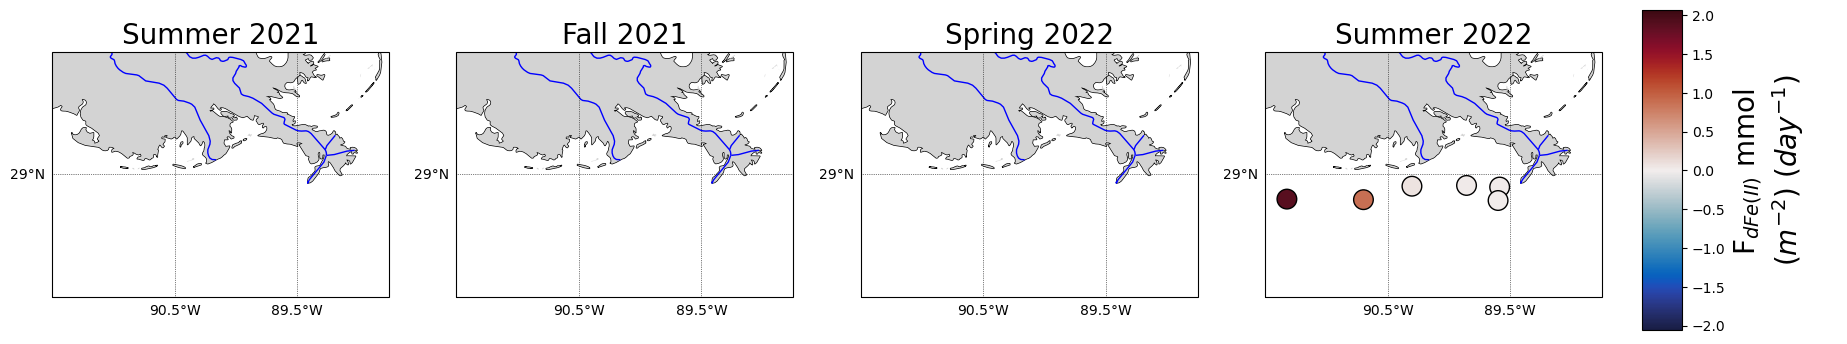

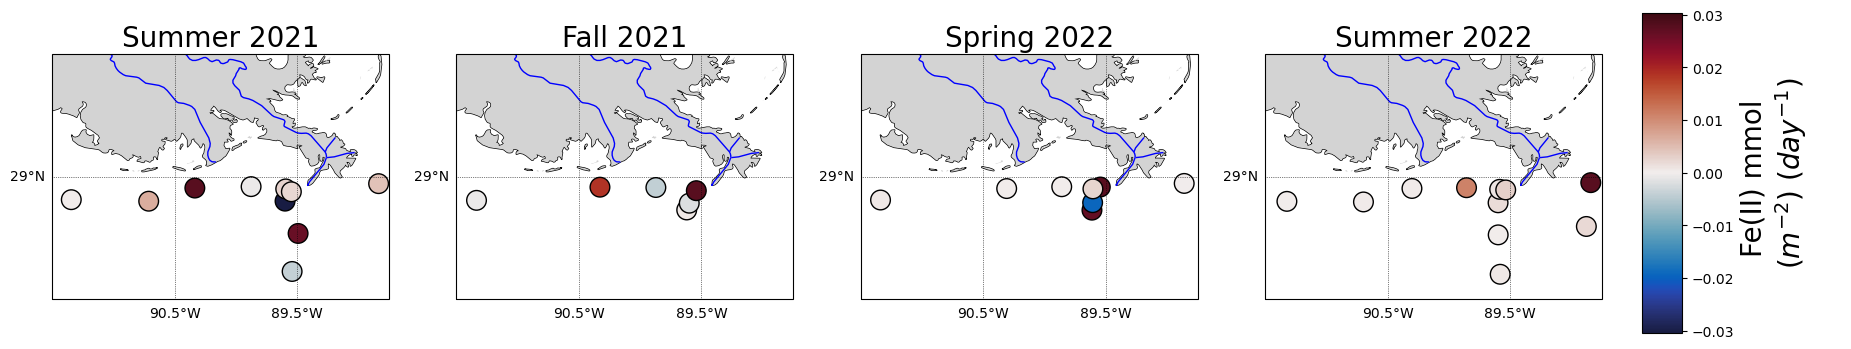

In [33]:
#set params 
data_f = flux_fe2_pw
topic = "pw_flux_fe2"
cb_name = r'F$_{dFe(II)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_fe2_pw_map.png"

#set params 
data_f = flux_fe2_bc
topic = "bc_flux_fe2"
cb_name = r'Fe(II) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_fe2_bc_map.png"


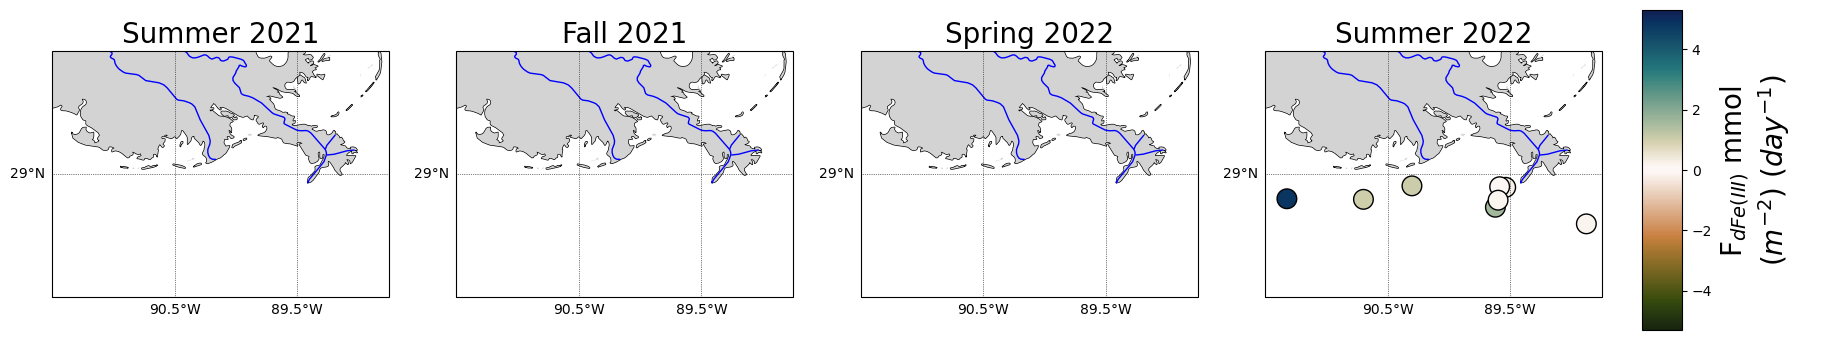

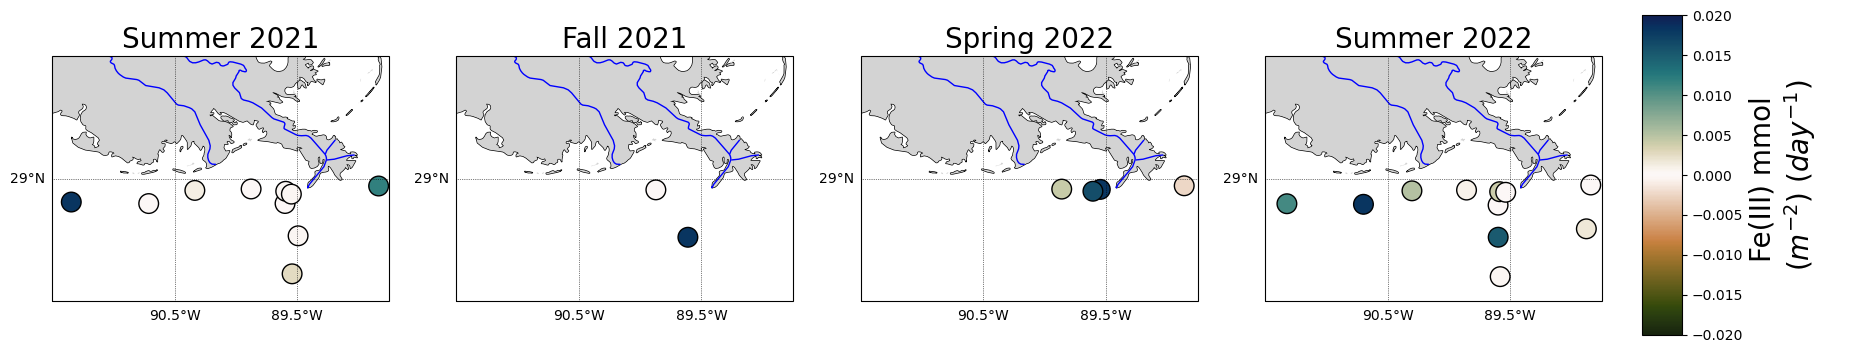

In [34]:
#set params 
data_f = flux_fe3_pw
topic = "pw_flux_fe3"
cb_name = r'F$_{dFe(III)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'
grad = cmo.tarn
map_fluxes(data_f, topic,cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_fe3_pw_map.png"


#set params 
data_f = flux_fe3_bc
topic = "bc_flux_fe3"
cb_name = r'Fe(III) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'
grad = cmo.tarn
map_fluxes(data_f, topic,cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_fe3_bc_map.png"


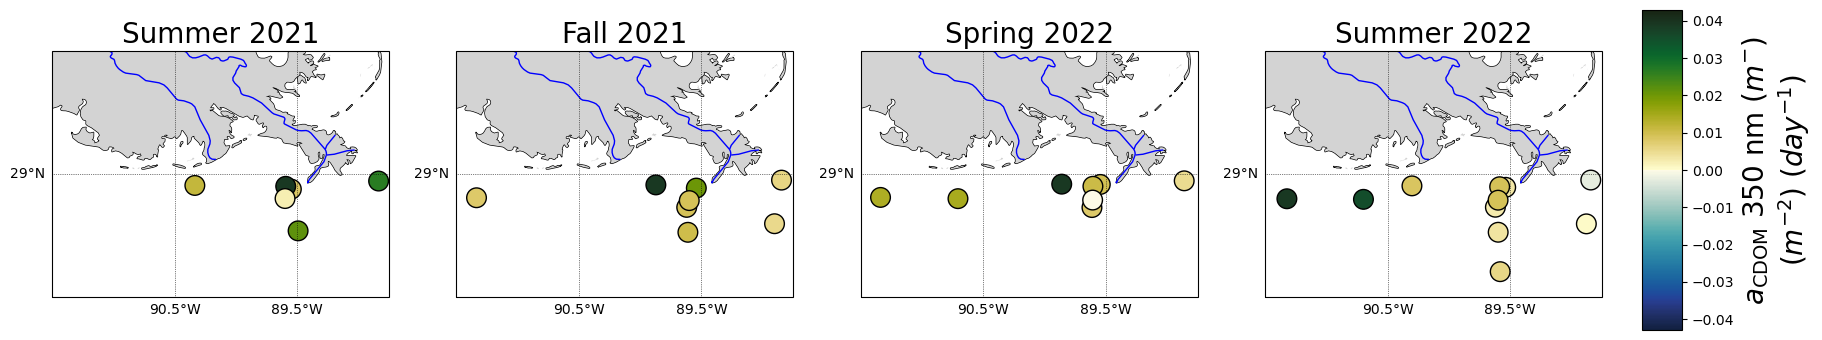

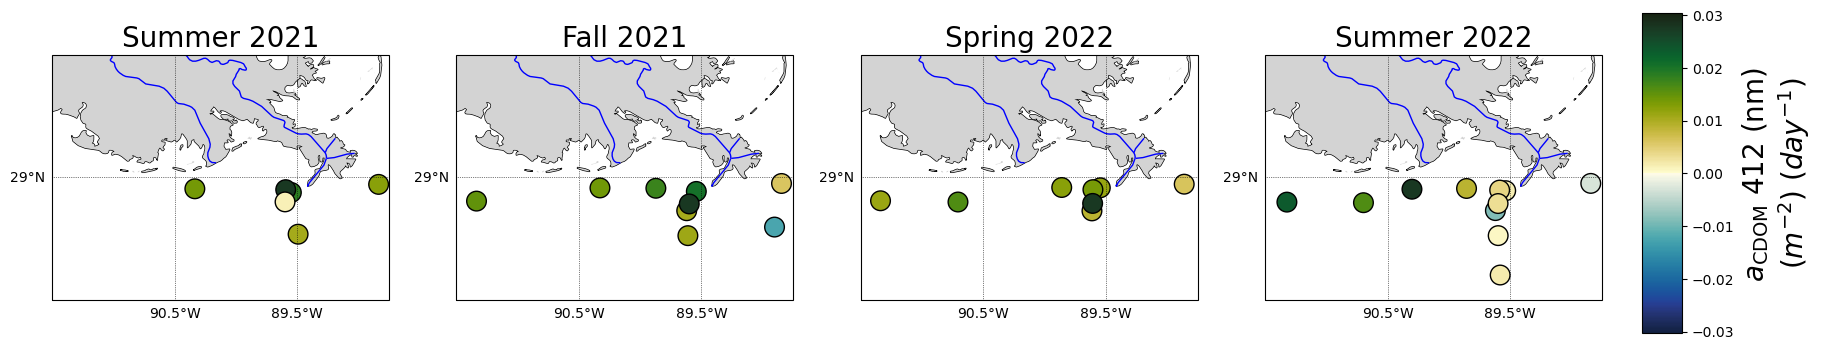

In [35]:
#set params 
data_f = flux_cdom_bc_350
topic = "bc_flux_aCDOM350"
cb_name = r'$a_{\mathrm{CDOM}}$ 350 nm $(m^{-})$'+'\n'+r'$(m^{-2})$ $(day^{-1})$'
grad = cmo.delta
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = flux_cdom_bc_412
topic = "bc_flux_aCDOM412"
cb_name = r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
grad = cmo.delta
map_fluxes(data_f, topic,cb_name, grad)


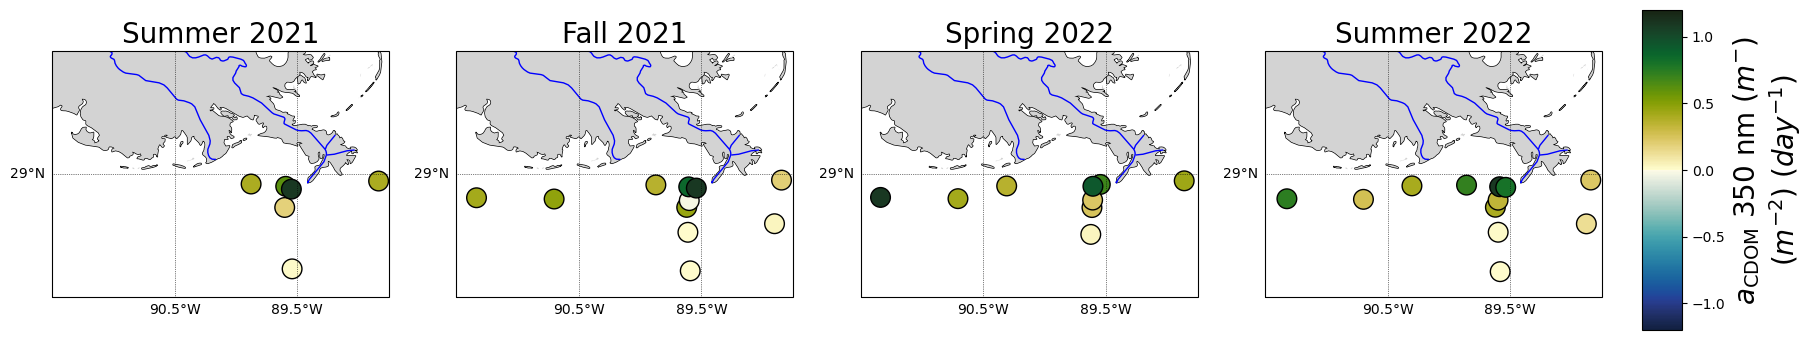

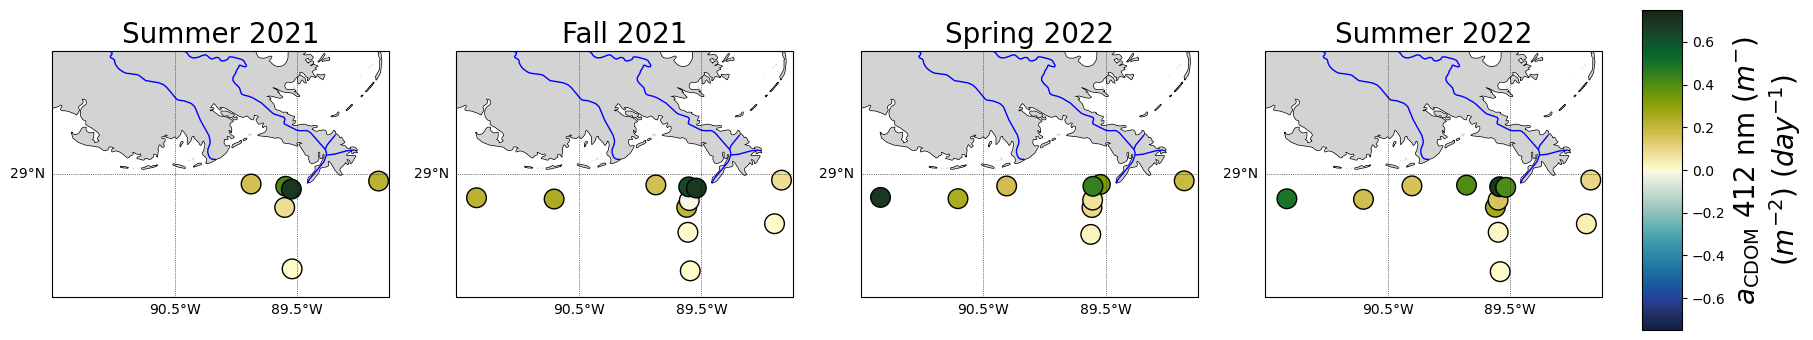

In [36]:
#set params 
data_f = flux_cdom_pw_350
topic = "pw_flux_aCDOM350"
cb_name = r'$a_{\mathrm{CDOM}}$ 350 nm $(m^{-})$'+'\n'+r'$(m^{-2})$ $(day^{-1})$'
grad = cmo.delta
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = flux_cdom_pw_412
topic = "pw_flux_aCDOM412"
cb_name = r'$a_{\mathrm{CDOM}}$ 412 nm $(m^{-})$'+'\n'+r'$(m^{-2})$ $(day^{-1})$'
grad = cmo.delta
map_fluxes(data_f, topic,cb_name, grad)

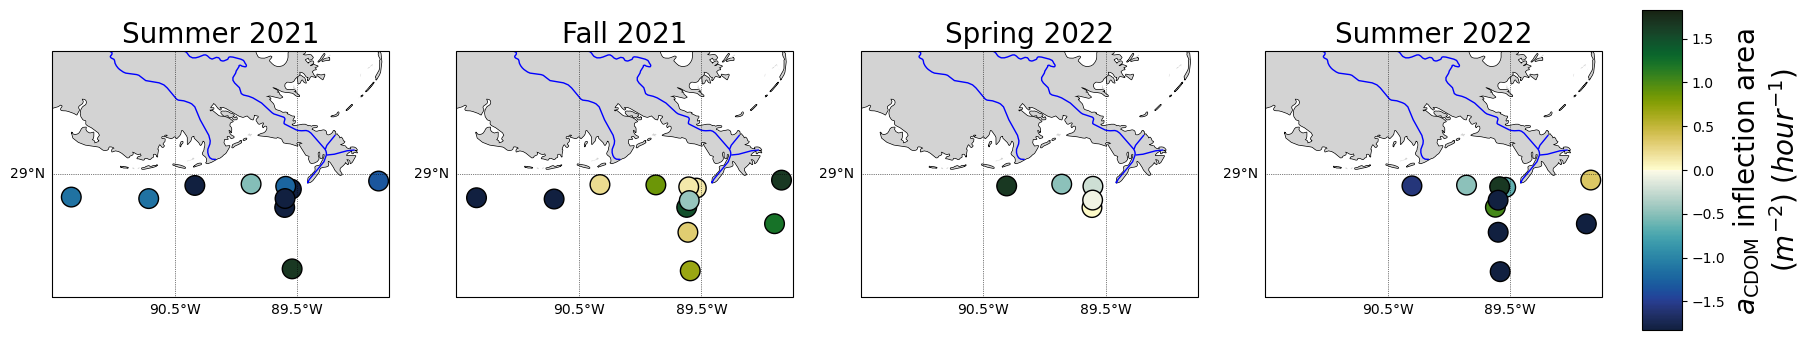

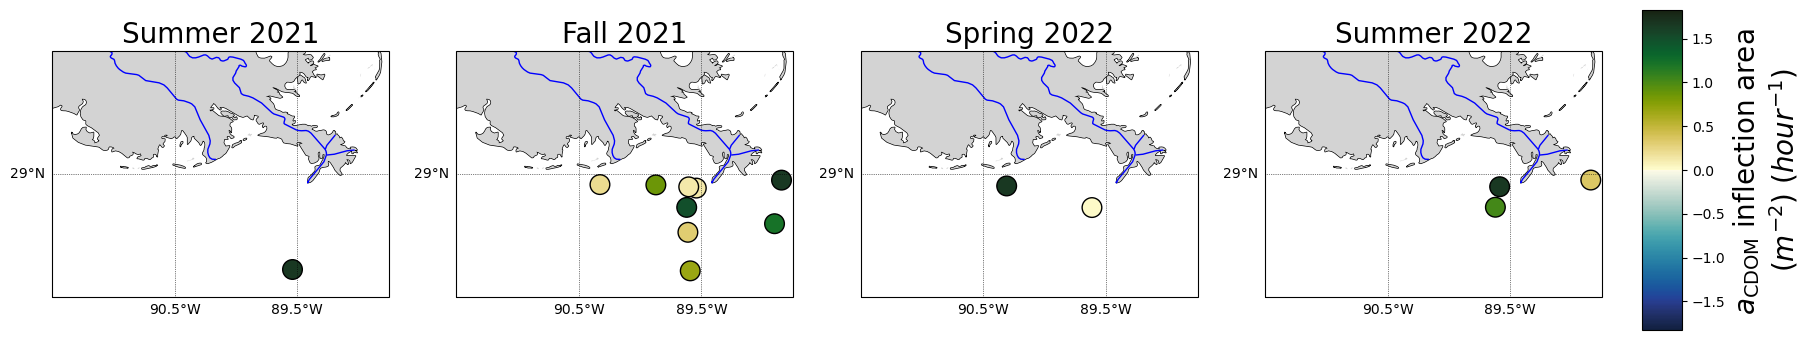

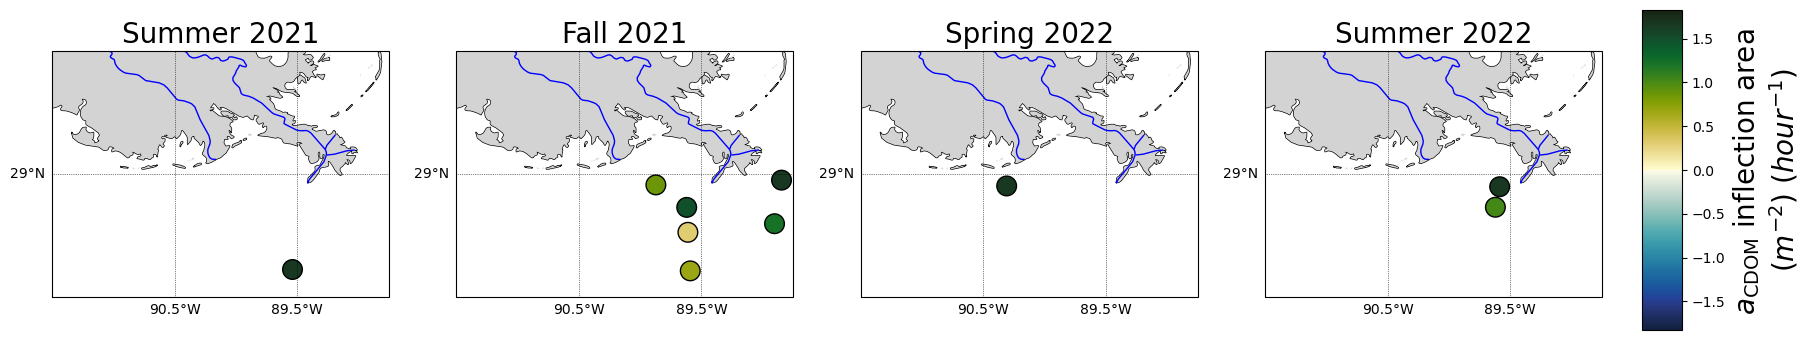

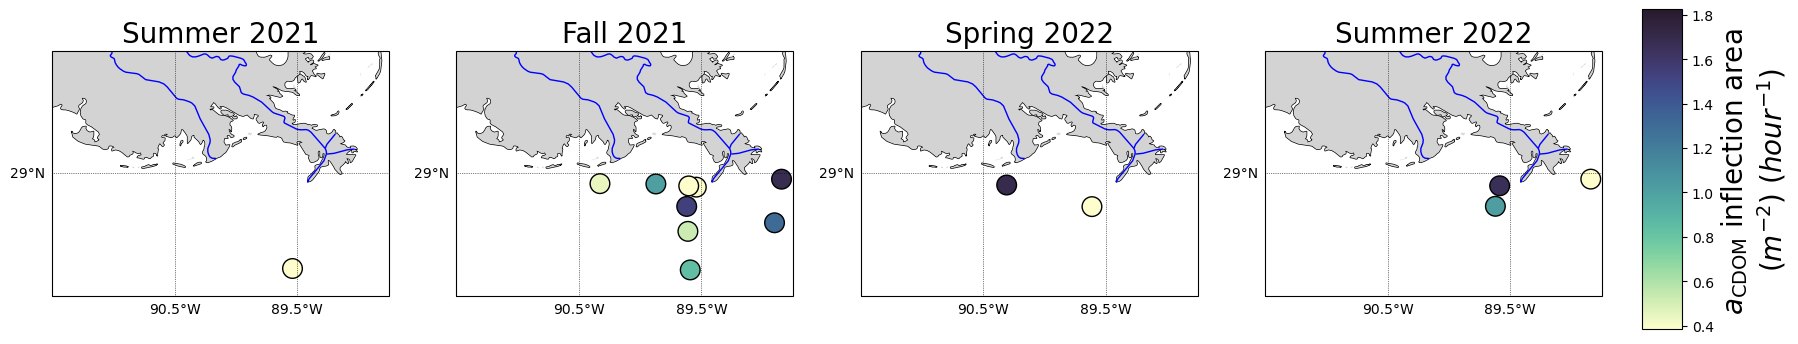

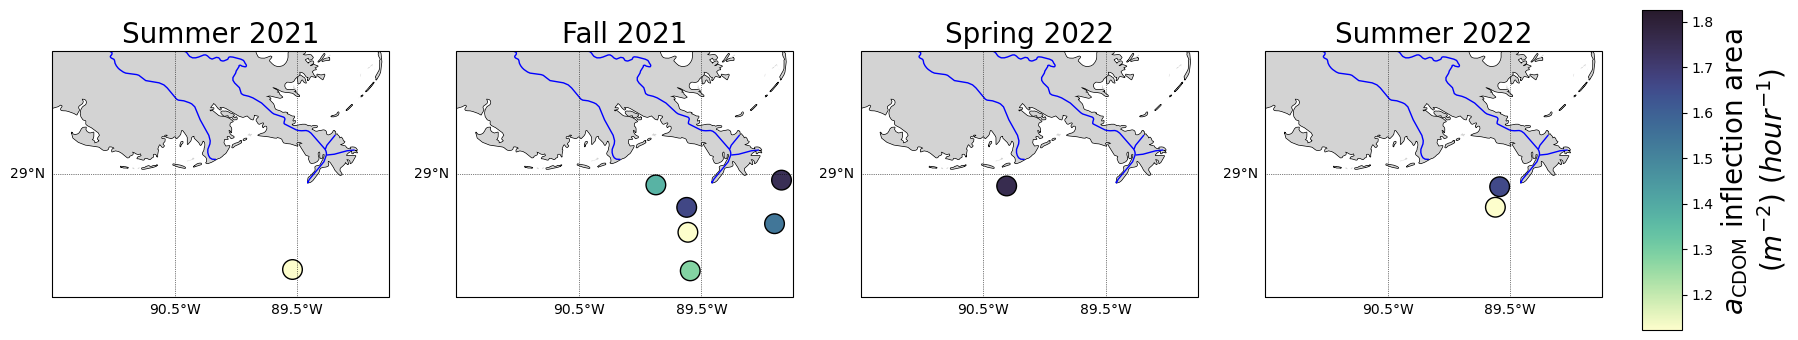

In [37]:
#set params 

df['bc_slope_inflec_pos'] = np.where(df['bc_slope_inflec'] >= 0, df['bc_slope_inflec'], np.nan)
df['bc_slope_inflec_big'] = np.where(df['bc_slope_inflec'] >= .5, df['bc_slope_inflec'], np.nan)


data_f = df
topic = "bc_slope_inflec"
cb_name = r'$a_{\mathrm{CDOM}}$ inflection area '+'\n'+r'$(m^{-2})$ $(hour^{-1})$'
grad = cmo.delta
map_fluxes(data_f, topic,cb_name, grad)

data_f = df
topic = "bc_slope_inflec_pos"
cb_name = r'$a_{\mathrm{CDOM}}$ inflection area '+'\n'+r'$(m^{-2})$ $(hour^{-1})$'
grad = cmo.delta
map_fluxes(data_f, topic,cb_name, grad)

data_f = df
topic = "bc_slope_inflec_big"
cb_name = r'$a_{\mathrm{CDOM}}$ inflection area '+'\n'+r'$(m^{-2})$ $(hour^{-1})$'
grad = cmo.delta
map_fluxes(data_f, topic,cb_name, grad)

data_f = df
topic = "bc_slope_inflec_pos"
cb_name = r'$a_{\mathrm{CDOM}}$ inflection area '+'\n'+r'$(m^{-2})$ $(hour^{-1})$'
grad = cmo.deep
map_stocks(data_f, topic, cb_name, grad)

data_f = df
topic = "bc_slope_inflec_big"
cb_name = r'$a_{\mathrm{CDOM}}$ inflection area '+'\n'+r'$(m^{-2})$ $(hour^{-1})$'
grad = cmo.deep
map_stocks(data_f, topic, cb_name, grad)

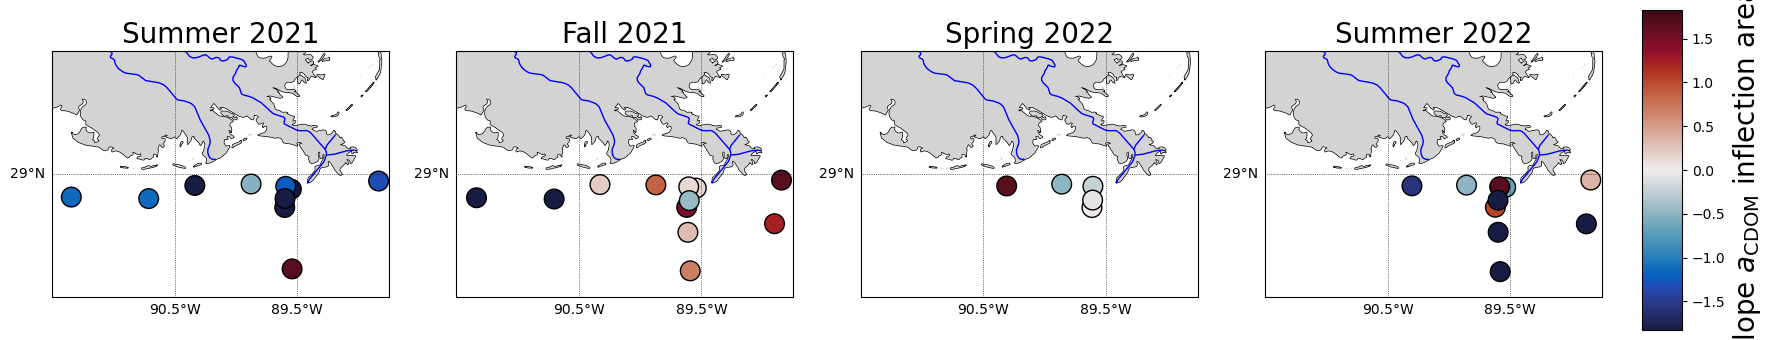

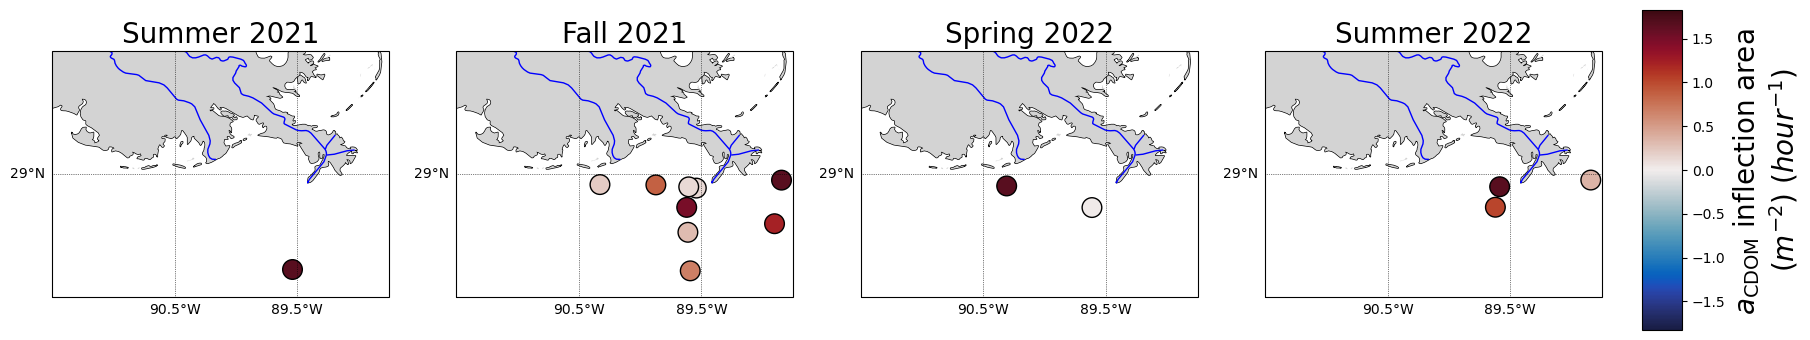

In [38]:
#set params 
data_f = df
topic = "bc_slope_inflec"
cb_name = r'slope $a_{\mathrm{CDOM}}$ inflection area'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_cdom_infec_map.png"

data_f = df
topic = "bc_slope_inflec_pos"
cb_name = r'$a_{\mathrm{CDOM}}$ inflection area '+'\n'+r'$(m^{-2})$ $(hour^{-1})$'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)

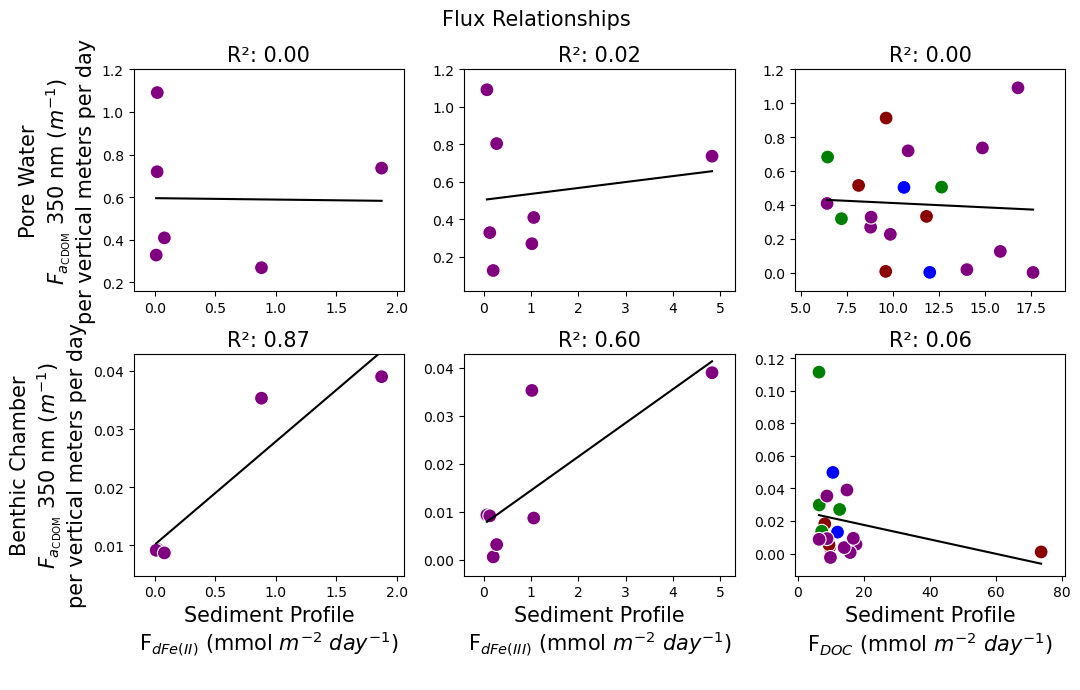

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11,7))

subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

# Loop through the subplots
for i, x_var in enumerate(['pw_flux_fe2', 'pw_flux_fe3','pw_flux_doc']):
    for j, y_var in enumerate(['pw_flux_aCDOM350', 'bc_flux_aCDOM350']):
        # Prepare the data for the subplot
        sub = df.dropna(subset=[x_var, y_var])
        sub = sub[sub['bc_flux_fe3'] < 0.15]
        data = sub[[x_var, y_var, 'Camp']]
        X = data[[x_var]]
        y = data[y_var]
        subcat = data['Camp'].tolist()  # Convert Series to list

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('pw_flux_doc', 'Sediment Profile'+'\n'+r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'+'\n').replace('pw_flux_fe2', 'Sediment Profile'+'\n'+r'F$_{dFe(II)}$ (mmol $m^{-2}$ $day^{-1})$').replace('pw_flux_fe3', 'Sediment Profile'+'\n'+r'F$_{dFe(III)}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
        else:
            ax.set_xlabel("")
        if i == 0:
        #FaCDOM(350 nm) (m-1 x vertical meters per day)
            ax.set_ylabel(y_var.replace('bc_flux_aCDOM350', 'Benthic Chamber'+'\n'+r'${F_{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)'+'\n'+ 'per vertical meters per day').replace('pw_flux_aCDOM350', 'Pore Water'+'\n'+r'${F_{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$)'+'\n'+ 'per vertical meters per day'), size=15)
        else:
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size=15)
        ax.set_ylim([data[y_var].min()-data[y_var].max()*.1, data[y_var].max()*1.1])
        ax.set_xlim([data[x_var].min()-data[x_var].max()*.1, data[x_var].max()*1.1])
        
# Adjust the layout of the subplots
fig.suptitle('Flux Relationships', size = 15)
fig.set_facecolor('w')
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_coro_doc_c.png"

plt.tight_layout()

plt.savefig(plot_save, dpi=300)

plt.show()

In [40]:
df['OCkg_5cm_deep/M2'] = df['OCg_5cm_deep/M2'] / 1000



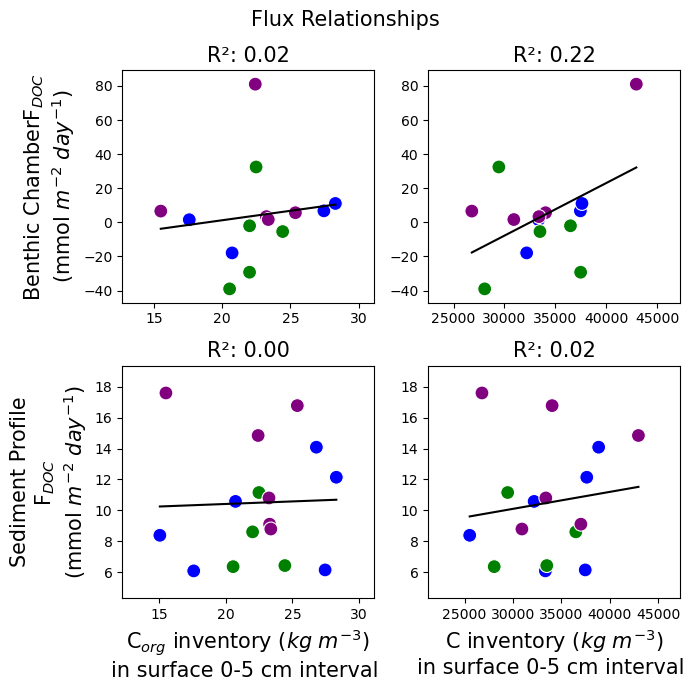

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}


# Loop through the subplots
for i, x_var in enumerate(['OCkg_5cm_deep/M2', 'Cg_5cm_deep/M2']):
    for j, y_var in enumerate(['bc_flux_doc', 'pw_flux_doc']):
        # Prepare the data for the subplot
        sub = df.dropna(subset=[x_var, y_var])
        #sub = sub[sub['bc_flux_fe3'] < 0.15]
        data = sub[[x_var, y_var, 'Camp']]
        X = data[[x_var]]
        y = data[y_var]
        subcat = data['Camp'].tolist()  # Convert Series to list

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if i == 0:
            ax.set_ylabel(y_var.replace('pw_flux_doc', 'Sediment Profile'+'\n'+r'F$_{DOC}$ '+'\n'+r'(mmol $m^{-2}$ $day^{-1})$').replace('bc_flux_doc', r'Benthic Chamber'+r'F$_{DOC}$ '+'\n'+r'(mmol $m^{-2}$ $day^{-1})$'), size=15)
        else:
            ax.set_ylabel("")
        if j == 1:
            ax.set_xlabel(x_var.replace('OCkg_5cm_deep/M2', r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval ').replace('Cg_5cm_deep/M2', r'C inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval ').replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'), size=15)
        else:
            ax.set_xlabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size=15)
        ax.set_ylim([data[y_var].min()-data[y_var].max()*.1, data[y_var].max()*1.1])
        ax.set_xlim([data[x_var].min()-data[x_var].max()*.1, data[x_var].max()*1.1])
        
# Adjust the layout of the subplots
fig.suptitle('Flux Relationships', size = 15)
fig.set_facecolor('w')
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_coro_doc_c.png"

plt.tight_layout()

plt.savefig(plot_save, dpi=300)


plt.show()

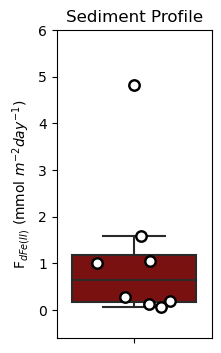

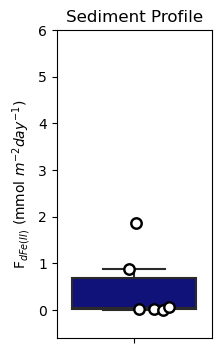

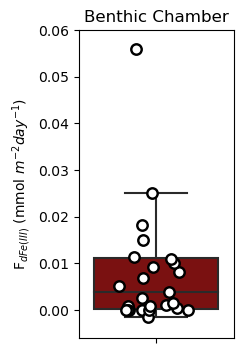

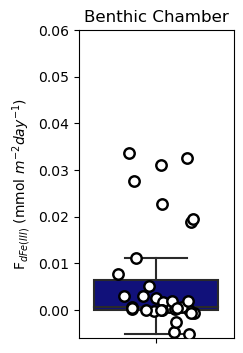

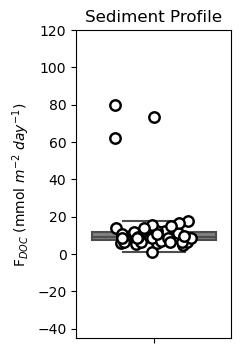

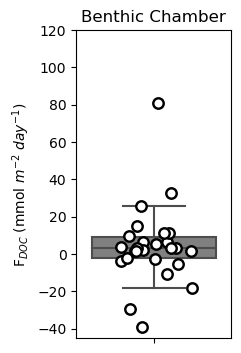

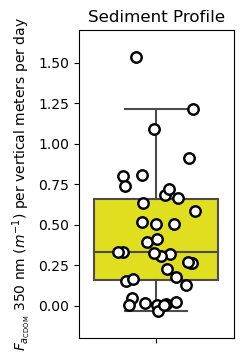

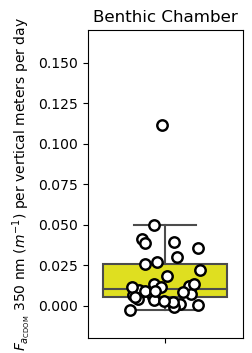

In [42]:
# Create a boxplot for pw_flux_fe3
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['pw_flux_fe3'], color='darkred', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['pw_flux_fe3'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'F$_{dFe(II)}$ (mmol $m^{-2} day^{-1})$')
plt.ylim(-.6,6)
plt.show()

# Create a boxplot for pw_flux_fe3
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['pw_flux_fe2'], color='darkblue', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['pw_flux_fe2'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'F$_{dFe(II)}$ (mmol $m^{-2} day^{-1})$')
plt.ylim(-.6,6)
plt.show()

# Create a boxplot for pw_flux_fe3
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['bc_flux_fe3'], color='darkred', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['bc_flux_fe3'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Benthic Chamber')
plt.ylabel(r'F$_{dFe(III)}$ (mmol $m^{-2} day^{-1})$')
plt.ylim(-.006,.06)
plt.show()

# Create a boxplot for pw_flux_fe3
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['bc_flux_fe2'], color='darkblue', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['bc_flux_fe2'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Benthic Chamber')
plt.ylabel(r'F$_{dFe(III)}$ (mmol $m^{-2} day^{-1})$')
plt.ylim(-.006,.06)
plt.show()

# Create a boxplot for pw_flux_doc
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['pw_flux_doc'], color='gray', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['pw_flux_doc'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.ylim(-45,120)
plt.show()

# Create a boxplot for bc_flux_doc
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['bc_flux_doc'], color='gray', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['bc_flux_doc'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Benthic Chamber')
plt.ylabel(r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.ylim(-45,120)
plt.show()

# Create a boxplot for pw_flux_doc
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['pw_flux_aCDOM350'], color='yellow', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['pw_flux_aCDOM350'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'${F_{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$) per vertical meters per day')
plt.ylim(-.2,1.7)
plt.show()

# Create a boxplot for bc_flux_doc
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['bc_flux_aCDOM350'], color='yellow', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['bc_flux_aCDOM350'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Benthic Chamber')
plt.ylabel(r'${F_{a_{\mathrm{CDOM}}}}$ 350 nm ($m^{-1}$) per vertical meters per day')
plt.ylim(-.02,.17)
plt.show()

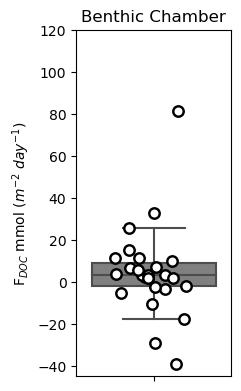

Mean of 'bc_flux_doc' excluding negative numbers: 12.581383227027485
standerd error of 'bc_flux_doc' excluding negative numbers: 4.496557402389486
DOC flux in nGOM Pg /year : 0.0005684537344813194
DOC flux standerd error in nGOM Pg / year: 0.00020316405609574874
0.0007716177905770682
0.0003652896783855707


In [43]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

# Create a boxplot for bc_flux_doc
plt.figure(figsize=(2, 4.5))
sns.boxplot(y=df['bc_flux_doc'], color='gray', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['bc_flux_doc'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Benthic Chamber')
plt.ylabel(r'F$_{DOC}$ mmol $(m^{-2}$ $day^{-1})$')
plt.ylim(-45,120)
plt.show()

# Filter out negative numbers
non_negative_values = df[df['bc_flux_doc'] >= 0]

# Calculate the mean of the filtered values
mean_bc_flux_doc = non_negative_values['bc_flux_doc'].mean()
sem_bc_flux_doc = non_negative_values['bc_flux_doc'].sem()


print("Mean of 'bc_flux_doc' excluding negative numbers:", mean_bc_flux_doc)
print("standerd error of 'bc_flux_doc' excluding negative numbers:", sem_bc_flux_doc)

Square_km = 1485440
print('DOC flux in nGOM Pg /year :', mean_bc_flux_doc*1e+6*365*Square_km/1000/12/1e+15)
print('DOC flux standerd error in nGOM Pg / year:',sem_bc_flux_doc*1e+6*365*Square_km/1000/12/1e+15)

print((mean_bc_flux_doc*1e+6*365*Square_km/1000/12/1e+15)+(sem_bc_flux_doc*1e+6*365*Square_km/1000/12/1e+15))
print((mean_bc_flux_doc*1e+6*365*Square_km/1000/12/1e+15)-(sem_bc_flux_doc*1e+6*365*Square_km/1000/12/1e+15))

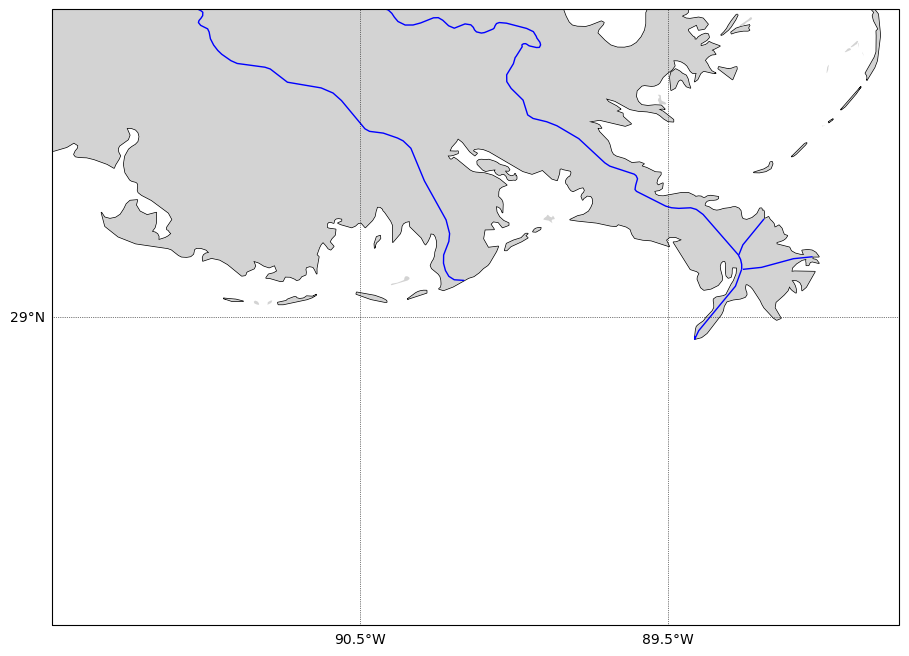

In [44]:
def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='lightgrey', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

def map_O2(data_f, topic, cb_name):
    camps = ['GOM2021']
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    plot_mapbase(extent, ax=axes)
    
data_f = df_o2
topic = 'O2_uM_bottom'
cb_name = r'Bottom Water O$_2$ $\mu$M'
map_O2(data_f, topic, cb_name)


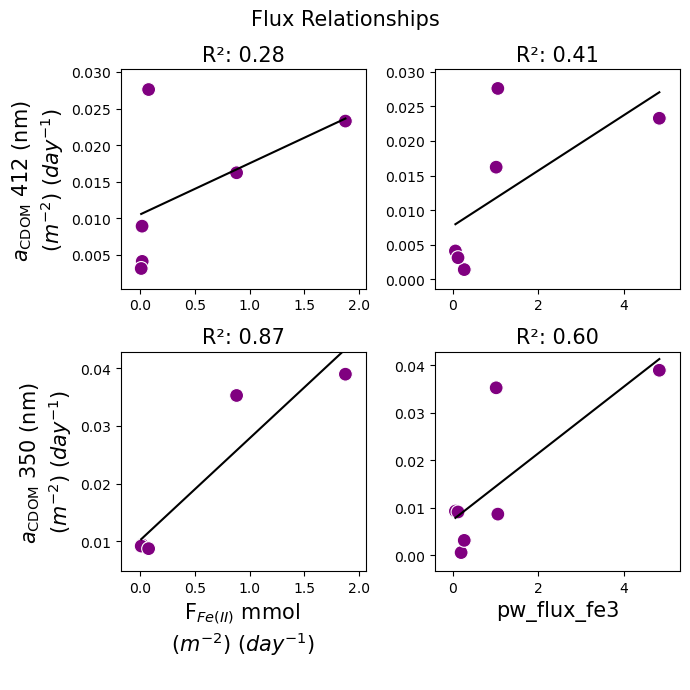

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

# Loop through the subplots
for i, x_var in enumerate(['pw_flux_fe2', 'pw_flux_fe3']):
    for j, y_var in enumerate(['bc_flux_aCDOM412', 'bc_flux_aCDOM350']):
        # Prepare the data for the subplot
        sub = df.dropna(subset=[x_var, y_var])
        sub = sub[sub['bc_flux_fe3'] < 0.15]
        data = sub[[x_var, y_var, 'Camp']]
        X = data[[x_var]]
        y = data[y_var]
        subcat = data['Camp'].tolist()  # Convert Series to list

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('pw_flux_fe2', r'F$_{Fe(II)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('bc_flux_fe3', r'Diffusive Fe(III) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'), size=15)
        else:
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$').replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'), size=15)
        else:
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size=15)
        ax.set_ylim([data[y_var].min()-data[y_var].max()*.1, data[y_var].max()*1.1])
        ax.set_xlim([data[x_var].min()-data[x_var].max()*.1, data[x_var].max()*1.1])
        
# Adjust the layout of the subplots
fig.suptitle('Flux Relationships', size = 15)
fig.set_facecolor('w')
plt.tight_layout()

plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_coro_cdom_fe.png"
plt.show()


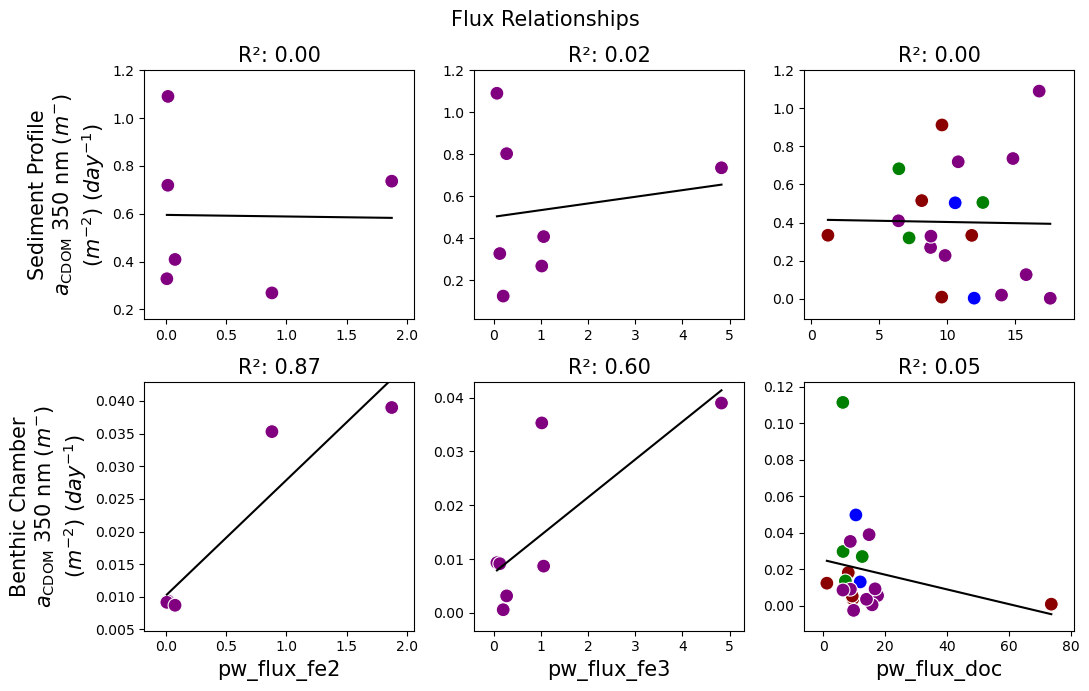

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11,7))

subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

# Loop through the subplots
for i, x_var in enumerate(['pw_flux_fe2', 'pw_flux_fe3','pw_flux_doc']):
    for j, y_var in enumerate(['pw_flux_aCDOM350', 'bc_flux_aCDOM350']):
        # Prepare the data for the subplot
        sub = df.dropna(subset=[x_var, y_var])
        sub = sub[sub['bc_flux_fe3'] < 4]
        data = sub[[x_var, y_var, 'Camp']]
        X = data[[x_var]]
        y = data[y_var]
        subcat = data['Camp'].tolist()  # Convert Series to list

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('bc_flux_doc', 'Benthic Chamber'+'\n'+r'F$_{DOC}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('bc_flux_fe2', 'Benthic Chamber'+'\n'+r'F$_{dFe(II)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$').replace('bc_flux_fe3', 'Benthic Chamber'+'\n'+r'F$_{dFe(III)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'), size=15)
        else:
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('bc_flux_aCDOM350', 'Benthic Chamber'+'\n'+r'$a_{\mathrm{CDOM}}$ 350 nm ($m^{-}$)'+'\n'+r'$(m^{-2})$ $(day^{-1})$').replace('pw_flux_aCDOM350', 'Sediment Profile'+'\n'+r'$a_{\mathrm{CDOM}}$ 350 nm ($m^{-}$)'+'\n'+r'$(m^{-2})$ $(day^{-1})$'), size=15)
        else:
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size=15)
        ax.set_ylim([data[y_var].min()-data[y_var].max()*.1, data[y_var].max()*1.1])
        ax.set_xlim([data[x_var].min()-data[x_var].max()*.1, data[x_var].max()*1.1])
        
# Adjust the layout of the subplots
fig.suptitle('Flux Relationships', size = 15)
fig.set_facecolor('w')
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_coro_doc_c.png"

plt.tight_layout()

plt.show()

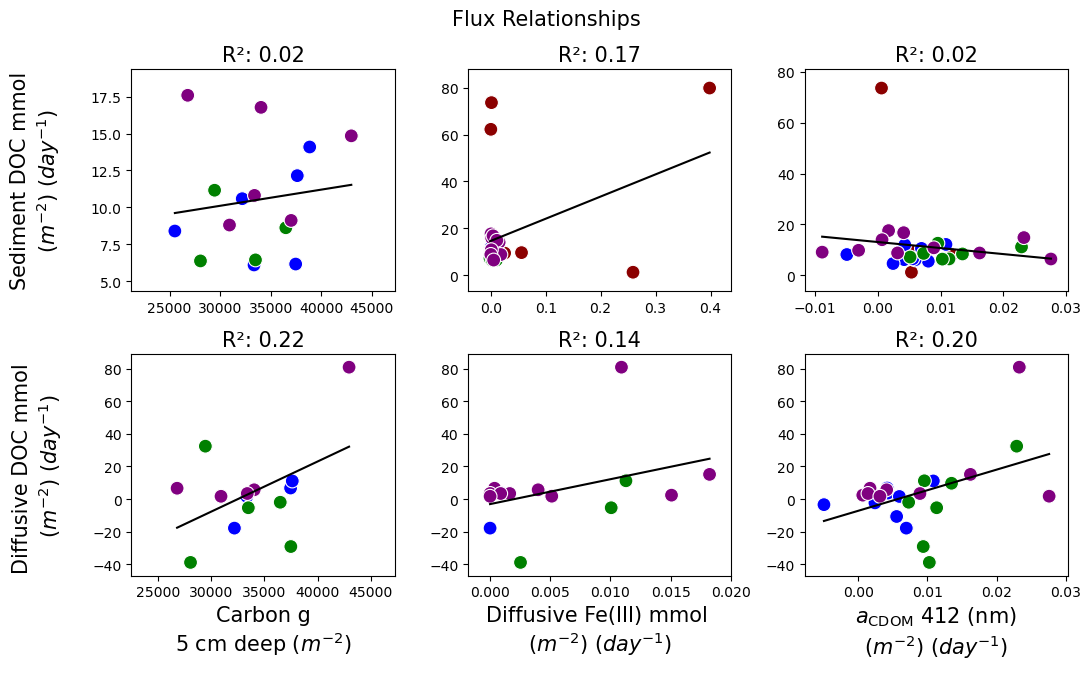

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11,7))

subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

# Loop through the subplots
for i, x_var in enumerate(['Cg_5cm_deep/M2','bc_flux_fe3','bc_flux_aCDOM412',]):
    for j, y_var in enumerate(['pw_flux_doc','bc_flux_doc' ]):
        # Prepare the data for the subplot
        sub = df.dropna(subset=[x_var, y_var])
        #sub = sub[sub['bc_flux_fe3'] < 0.15]
        data = sub[[x_var, y_var, 'Camp']]
        X = data[[x_var]]
        y = data[y_var]
        subcat = data['Camp'].tolist()  # Convert Series to list

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if i == 0:
            ax.set_ylabel(y_var.replace('pw_flux_doc', r'Sediment DOC mmol'+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('bc_flux_doc', r'Diffusive DOC mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'), size=15)
        else:
            ax.set_ylabel("")
        if j == 1:
            ax.set_xlabel(x_var.replace('bc_flux_fe3', r'Diffusive Fe(III) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('Cg_5cm_deep/M2', r'Carbon g'+'\n'+r'5 cm deep $(m^{-2})$'+'\n').replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$').replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'), size=15)
        else:
            ax.set_xlabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size=15)
        ax.set_ylim([data[y_var].min()-data[y_var].max()*.1, data[y_var].max()*1.1])
        ax.set_xlim([data[x_var].min()-data[x_var].max()*.1, data[x_var].max()*1.1])
        
# Adjust the layout of the subplots
fig.suptitle('Flux Relationships', size = 15)
fig.set_facecolor('w')
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_coro_doc_fe_c.png"

plt.tight_layout()

plt.show()

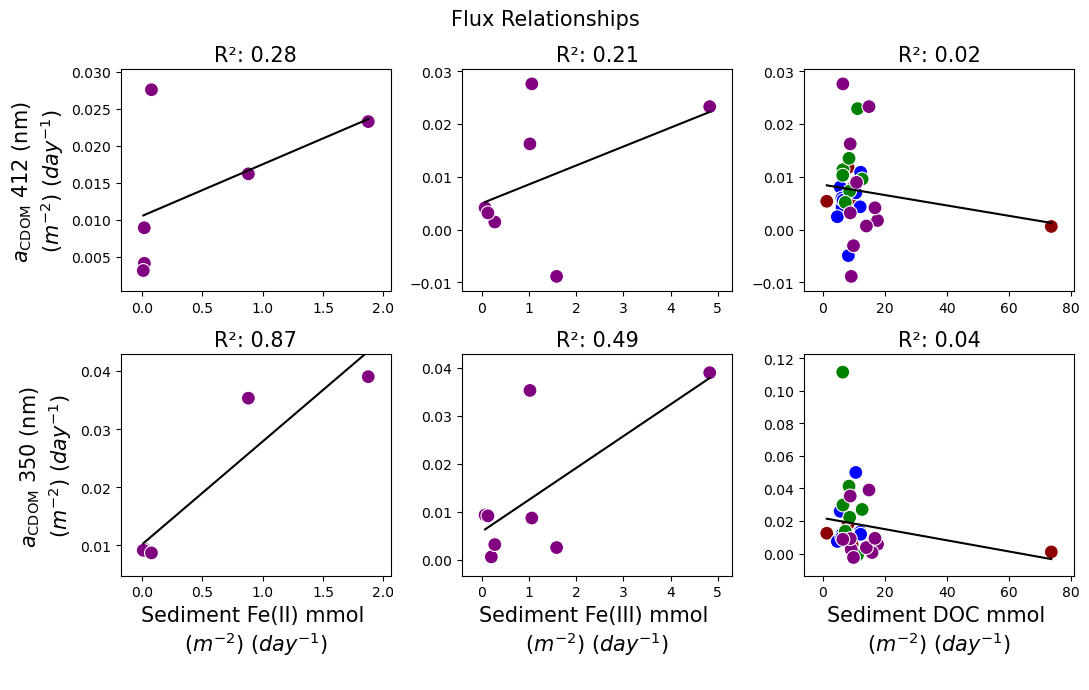

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11,7))

subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

# Loop through the subplots
for i, x_var in enumerate(['pw_flux_fe2','pw_flux_fe3','pw_flux_doc',]):
    for j, y_var in enumerate(['bc_flux_aCDOM412','bc_flux_aCDOM350' ]):
        # Prepare the data for the subplot
        sub = df.dropna(subset=[x_var, y_var])
        #sub = sub[sub['bc_flux_fe3'] < 0.15]
        data = sub[[x_var, y_var, 'Camp']]
        X = data[[x_var]]
        y = data[y_var]
        subcat = data['Camp'].tolist()  # Convert Series to list

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if i == 0:
            ax.set_ylabel(y_var.replace('pw_flux_doc', r'Sediment DOC mmol'+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('bc_flux_doc', r'Diffusive DOC mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$').replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'), size=15)
        else:
            ax.set_ylabel("")
        if j == 1:
            ax.set_xlabel(x_var.replace('pw_flux_fe3', r'Sediment Fe(III) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('pw_flux_fe2', r'Sediment Fe(II) mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('Cg_5cm_deep/M2', r'Carbon g'+'\n'+r'5 cm deep $(m^{-2})$'+'\n').replace('pw_flux_doc', r'Sediment DOC mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$').replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'), size=15)
        else:
            ax.set_xlabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size=15)
        ax.set_ylim([data[y_var].min()-data[y_var].max()*.1, data[y_var].max()*1.1])
        ax.set_xlim([data[x_var].min()-data[x_var].max()*.1, data[x_var].max()*1.1])
        
# Adjust the layout of the subplots
fig.suptitle('Flux Relationships', size = 15)
fig.set_facecolor('w')
plot_save = "../Dissertation_projects/Figures/Flux_figures/flux_coro_doc_fe_c.png"

plt.tight_layout()

plt.show()

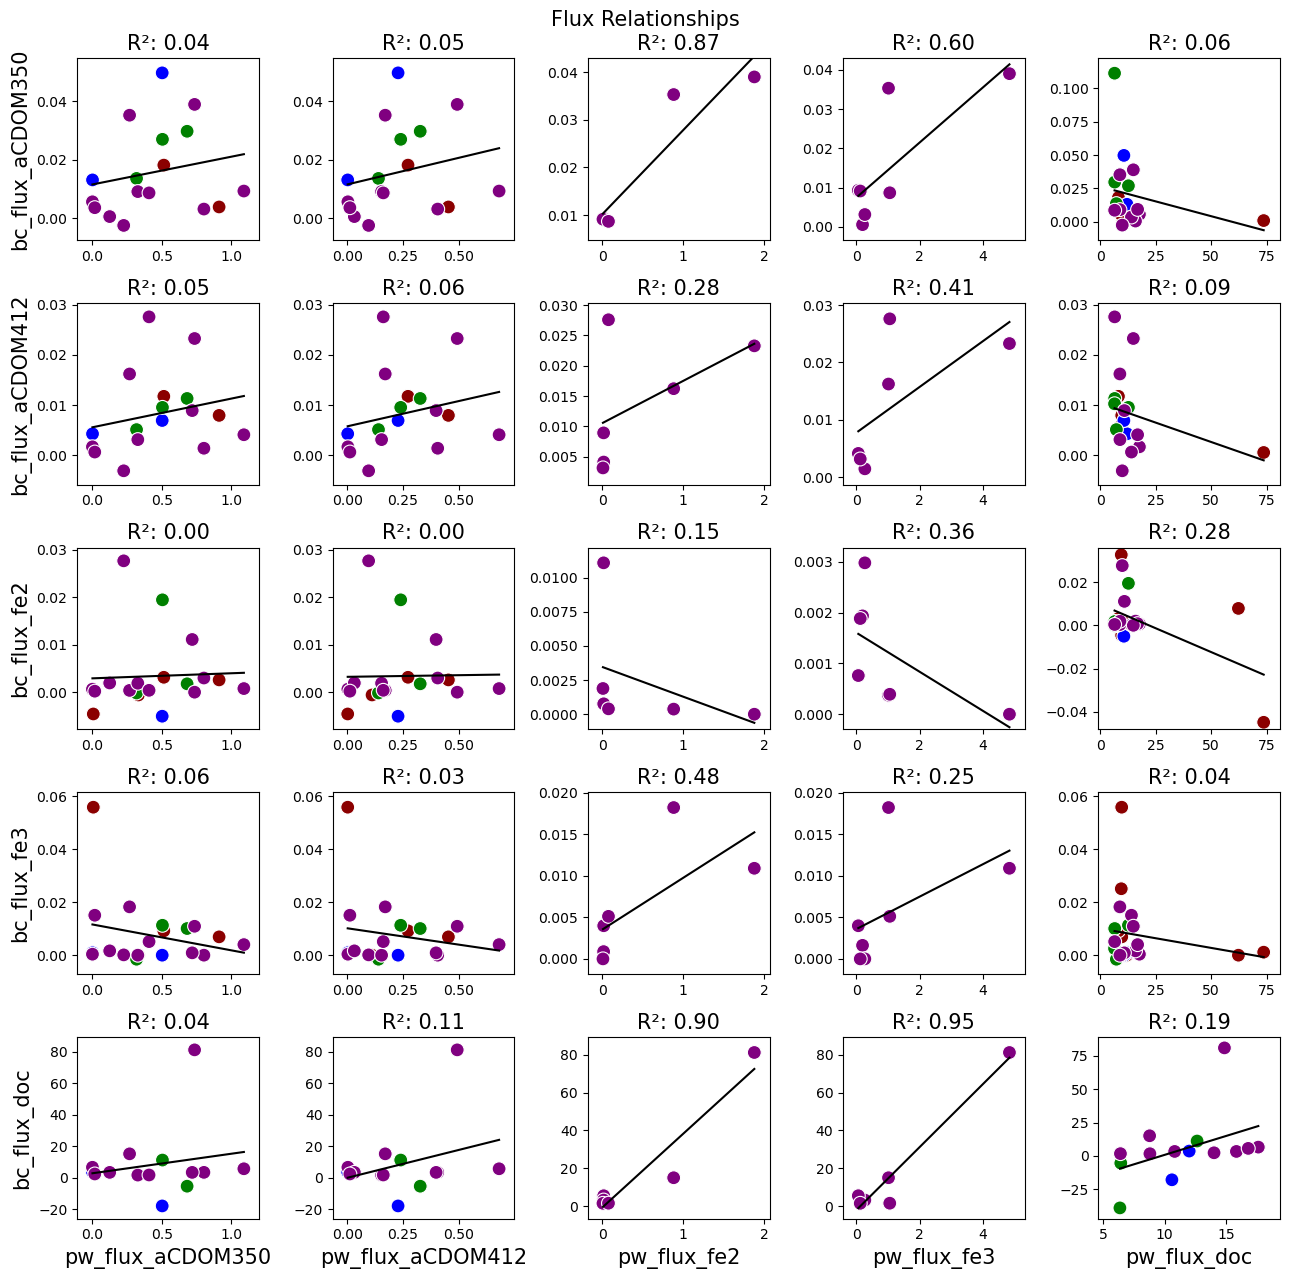

In [49]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(13,13))

subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

# Loop through the subplots
for i, x_var in enumerate(['pw_flux_aCDOM350','pw_flux_aCDOM412','pw_flux_fe2','pw_flux_fe3','pw_flux_doc']):
    for j, y_var in enumerate(['bc_flux_aCDOM350','bc_flux_aCDOM412','bc_flux_fe2','bc_flux_fe3','bc_flux_doc']):
        # Prepare the data for the subplot
        sub = df.dropna(subset=[x_var, y_var])
        sub = sub[sub['bc_flux_fe3'] < 0.15]
        data = sub[[x_var, y_var, 'Camp']]
        X = data[[x_var]]
        y = data[y_var]
        subcat = data['Camp'].tolist()  # Convert Series to list

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if i == 0:
            ax.set_ylabel(y_var, size=15)
        else:
            ax.set_ylabel("")
        if j == 4:
            ax.set_xlabel(x_var, size=15)
        else:
            ax.set_xlabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size=15)
        ax.set_ylim([data[y_var].min()-data[y_var].max()*.1, data[y_var].max()*1.1])
        ax.set_xlim([data[x_var].min()-data[x_var].max()*.1, data[x_var].max()*1.1])
        
# Adjust the layout of the subplots
fig.suptitle('Flux Relationships', size = 15)
fig.set_facecolor('w')

plt.tight_layout()

plt.show()

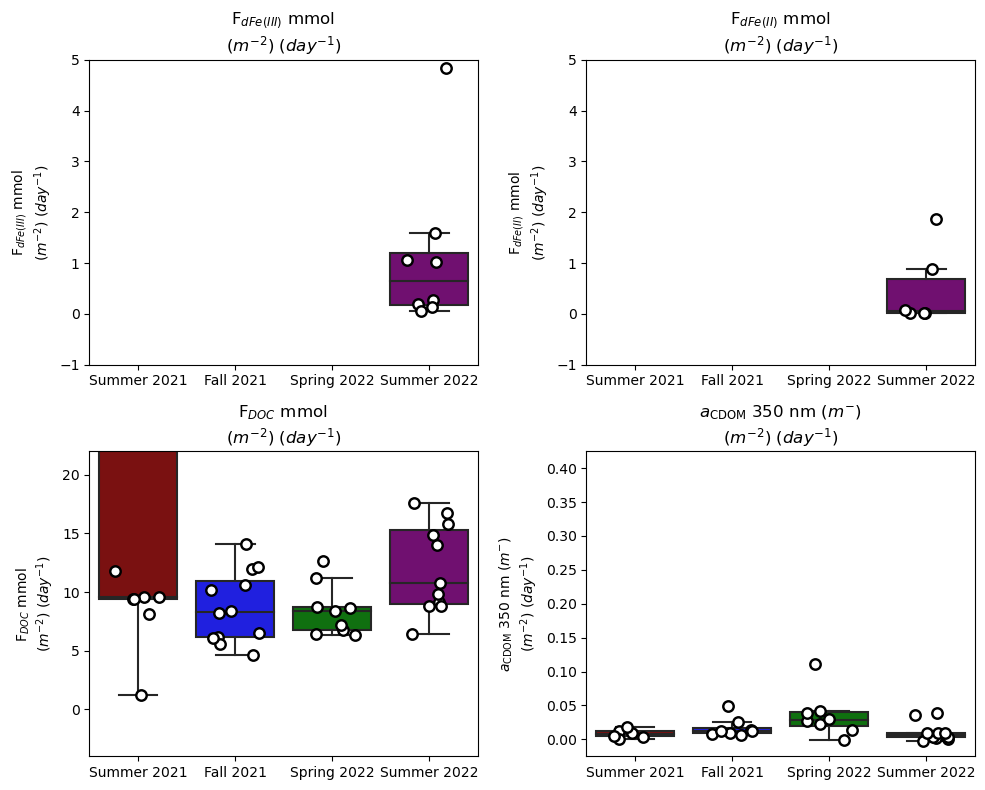

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'bc_flux_aCDOM350': r'$a_{\mathrm{CDOM}}$ 350 nm ($m^{-}$) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
}

variable_limits = {
    'pw_flux_doc': (-4, 22), 
    'pw_flux_fe3': (-1, 5),
    'pw_flux_fe2': (-1, 5),
    'bc_flux_aCDOM350': (-0.025, 0.425)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["pw_flux_fe3", "pw_flux_fe2","pw_flux_doc", "bc_flux_aCDOM350"]

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='Camp', y=var, palette=color_map, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='Camp', y=var, color='white', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.75, edgecolor = 'black')
    axes.flatten()[i].set_title(variable_label_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    
# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


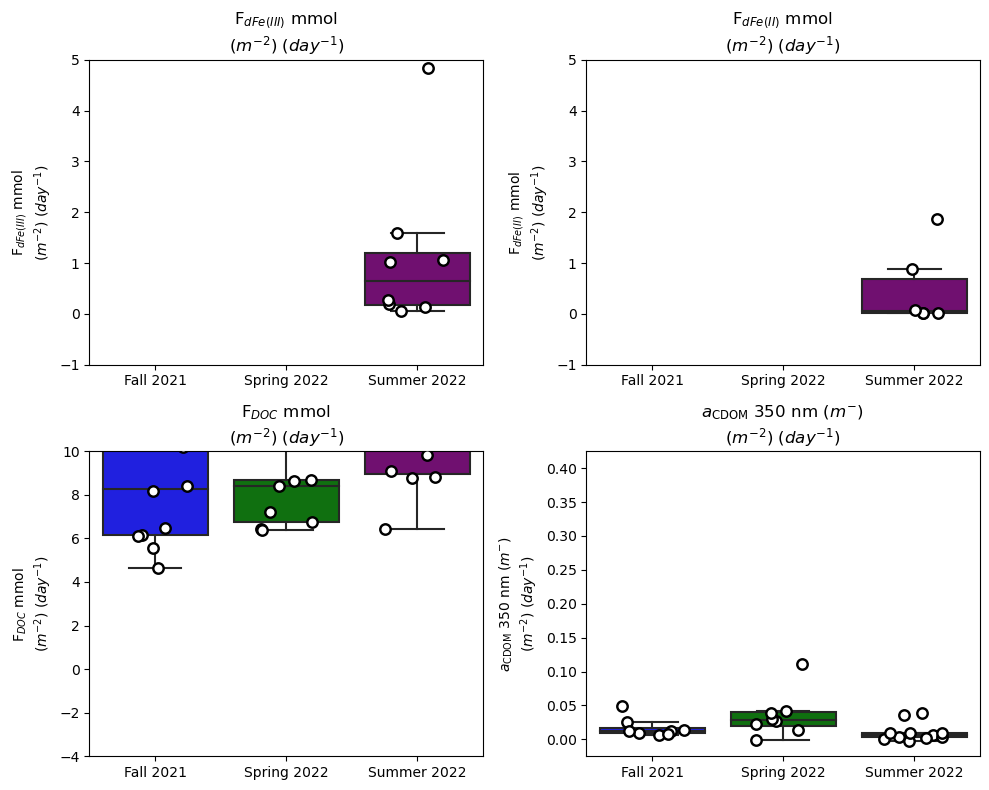

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors and labels
color_map = {
    #'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map = {
    #'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'bc_flux_aCDOM350': r'$a_{\mathrm{CDOM}}$ 350 nm ($m^{-}$) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'
}

variable_limits = {
    'pw_flux_doc': (-4, 10), 
    'pw_flux_fe3': (-1, 5),
    'pw_flux_fe2': (-1, 5),
    'bc_flux_aCDOM350': (-0.025, 0.425)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["pw_flux_fe3", "pw_flux_fe2","pw_flux_doc", "bc_flux_aCDOM350"]

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='Camp', y=var, palette=color_map, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='Camp', y=var, color='white', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.75, edgecolor = 'black')
    axes.flatten()[i].set_title(variable_label_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    
# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


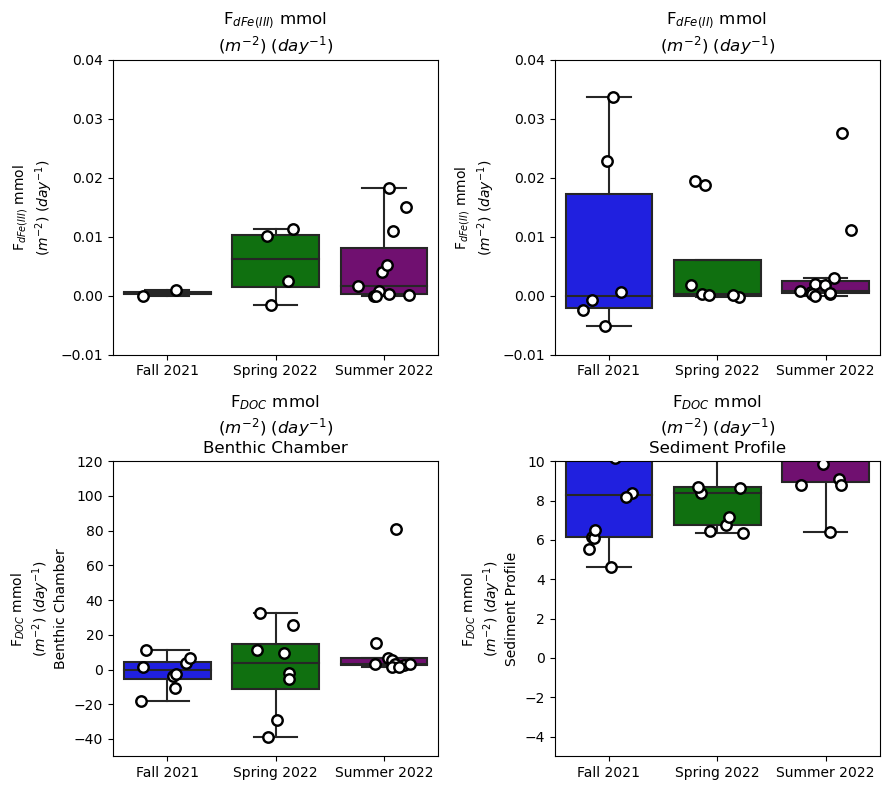

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors and labels
color_map = {
    #'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map = {
    #'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

variable_label_map = {
    'bc_flux_doc': r'F$_{DOC}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'+'Benthic Chamber',
    'bc_flux_fe3': r'F$_{dFe(III)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'bc_flux_fe2': r'F$_{dFe(II)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'pw_flux_doc': r'F$_{DOC}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'+'Sediment Profile',
}

variable_limits = {
    'bc_flux_doc': (-50, 120), 
    'bc_flux_fe3': (-.01, .04),
    'bc_flux_fe2': (-.01, .04),
    'pw_flux_doc': (-5, 10)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["bc_flux_fe3", "bc_flux_fe2","bc_flux_doc", "pw_flux_doc"]

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(9, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='Camp', y=var, palette=color_map, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='Camp', y=var, color='white', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.75, edgecolor = 'black')
    axes.flatten()[i].set_title(variable_label_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    
# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


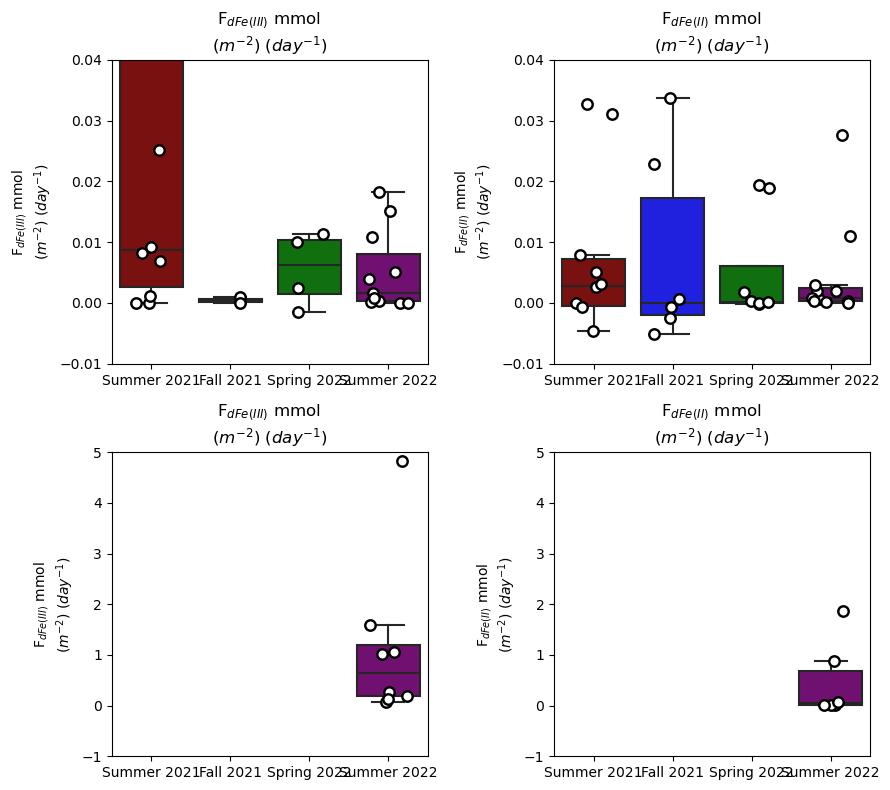

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

variable_label_map = {
    'pw_flux_fe3': r'F$_{dFe(III)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'bc_flux_fe3': r'F$_{dFe(III)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'bc_flux_fe2': r'F$_{dFe(II)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$ mmol '+'\n'+r'$(m^{-2})$ $(day^{-1})$',
}

variable_limits = {
    'pw_flux_fe3': (-1, 5), 
    'bc_flux_fe3': (-.01, .04),
    'bc_flux_fe2': (-.01, .04),
    'pw_flux_fe2': (-1, 5)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["bc_flux_fe3", "bc_flux_fe2","pw_flux_fe3", "pw_flux_fe2"]

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(9, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='Camp', y=var, palette=color_map, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='Camp', y=var, color='white', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.75, edgecolor = 'black')
    axes.flatten()[i].set_title(variable_label_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    
# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


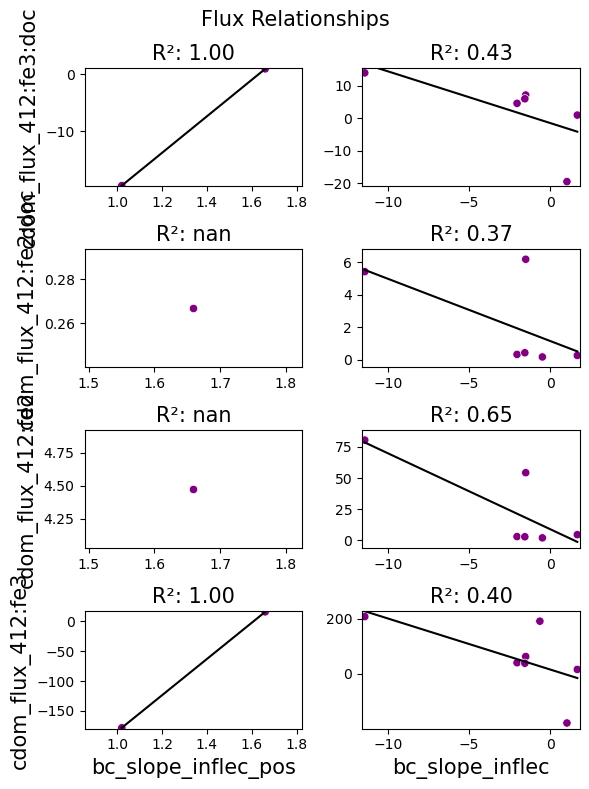

In [54]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(6, 8))

subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

df['cdom_flux_350:412'] = df['bc_flux_aCDOM350']/df['bc_flux_aCDOM412']
df['cdom_flux_412:fe3'] = df['pw_flux_fe3']/df['bc_flux_aCDOM412']
df['cdom_flux_412:fe2'] = df['pw_flux_fe2']/df['bc_flux_aCDOM412']
df['cdom_flux_350:fe3'] = df['pw_flux_fe3']/df['bc_flux_aCDOM350']
df['cdom_flux_350:fe2'] = df['pw_flux_fe2']/df['bc_flux_aCDOM350']

df['cdom_flux_412:fe3:doc'] = df['pw_flux_fe3']/df['bc_flux_aCDOM412']/df['pw_flux_doc']
df['cdom_flux_412:fe2:doc'] = df['pw_flux_fe2']/df['bc_flux_aCDOM412']/df['pw_flux_doc']

# Loop through the subplots
for i, x_var in enumerate(['bc_slope_inflec_pos', 'bc_slope_inflec']):
    for j, y_var in enumerate(['cdom_flux_412:fe3:doc', 'cdom_flux_412:fe2:doc', 'cdom_flux_412:fe2', 'cdom_flux_412:fe3']):
        # Prepare the data for the subplot
        sub = df.dropna(subset=[x_var, y_var])
        data = sub[[x_var, y_var, 'Camp']]
        X = data[[x_var]]
        y = data[y_var]
        subcat = data['Camp'].tolist()  # Convert Series to list

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 3:
            ax.set_xlabel(x_var.replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$').replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'), size=15)
        else:
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('pw_flux_doc', r'DOC ($\mu$M) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('pw_flux_fe3', r'Fe3 ($\mu$M) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'), size=15)
        else:
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size=15)
        ax.set_ylim([data[y_var].min()-data[y_var].max()*.1, data[y_var].max()*1.1])
        ax.set_xlim([data[x_var].min()-data[x_var].max()*.1, data[x_var].max()*1.1])
        
# Adjust the layout of the subplots
fig.suptitle('Flux Relationships', size = 15)
fig.set_facecolor('w')
plt.tight_layout()

plt.show()

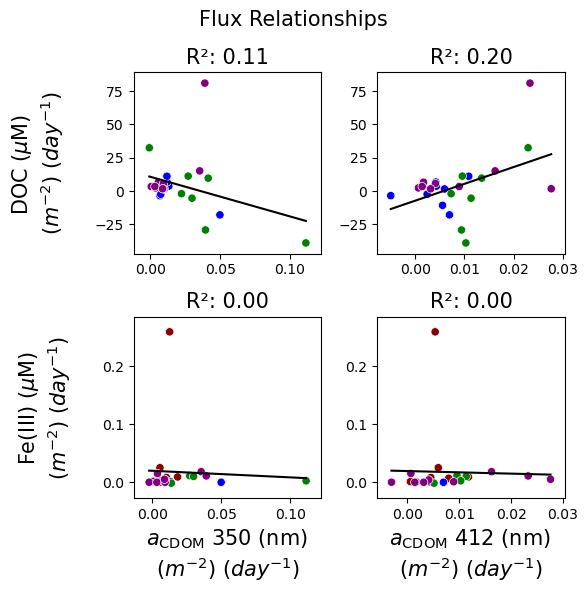

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

subcategories = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']

# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

# Loop through the subplots
for i, x_var in enumerate(['bc_flux_aCDOM350', 'bc_flux_aCDOM412']):
    for j, y_var in enumerate(['bc_flux_doc', 'bc_flux_fe3']):
        # Prepare the data for the subplot
        sub = df.dropna(subset=[x_var, y_var])
        data = sub[[x_var, y_var, 'Camp']]
        X = data[[x_var]]
        y = data[y_var]
        subcat = data['Camp'].tolist()  # Convert Series to list

        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        # Set the axis labels and title
        if j == 1:
            ax.set_xlabel(x_var.replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$').replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 412 (nm) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'), size=15)
        else:
            ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(y_var.replace('bc_flux_doc', r'DOC ($\mu$M) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n').replace('bc_flux_fe3', r'Fe(III) ($\mu$M) '+'\n'+r'$(m^{-2})$ $(day^{-1})$'+'\n'), size=15)
        else:
            ax.set_ylabel("")
        ax.set_title(f'R\u00B2: {score:.2f}', size=15)
        ax.set_ylim([data[y_var].min()-data[y_var].max()*.1, data[y_var].max()*1.1])
        ax.set_xlim([data[x_var].min()-data[x_var].max()*.1, data[x_var].max()*1.1])
        
# Adjust the layout of the subplots
fig.suptitle('Flux Relationships', size = 15)
fig.set_facecolor('w')
plt.tight_layout()

plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9928\1387062883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9928\1387062883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9928\1387062883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Lo

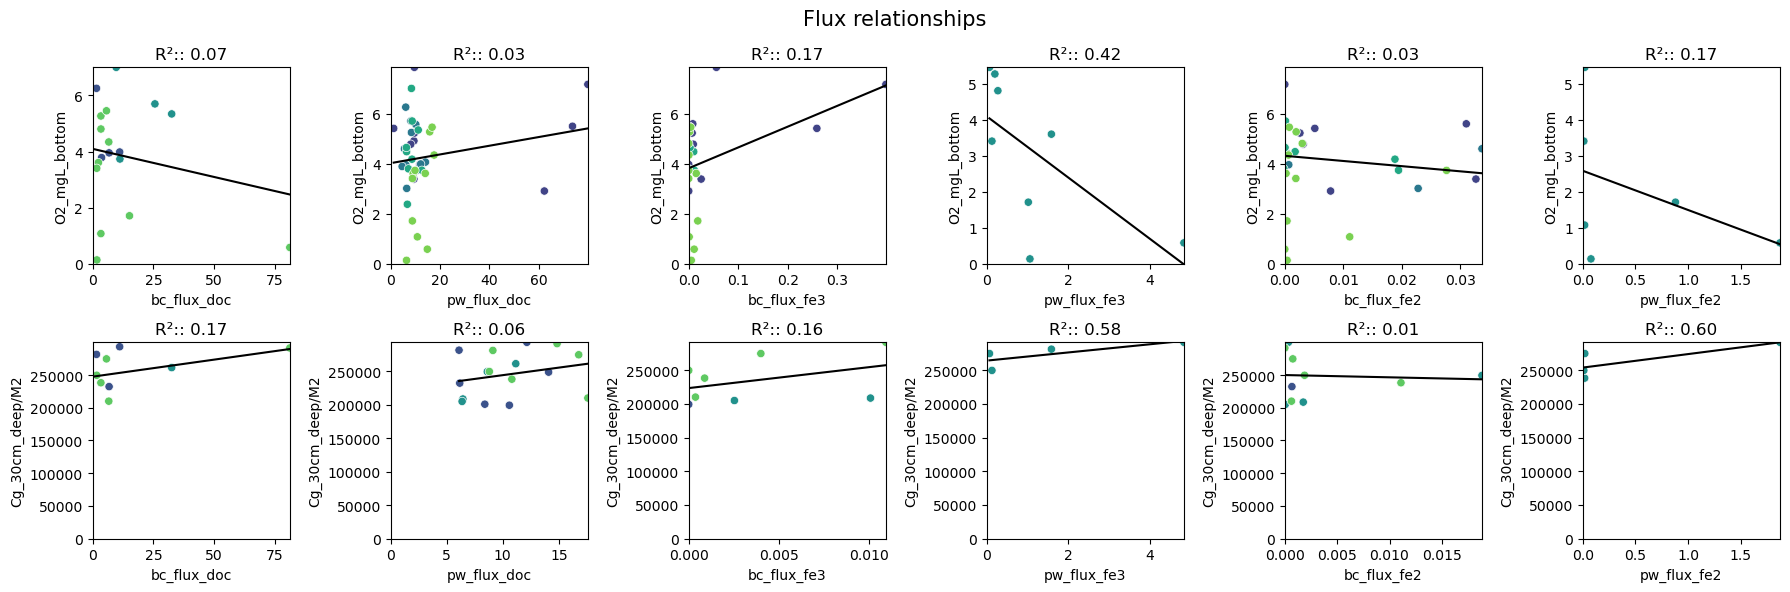

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 6))

# Loop through the subplots
for i, x_var in enumerate(['bc_flux_doc', 'pw_flux_doc','bc_flux_fe3', 'pw_flux_fe3','bc_flux_fe2', 'pw_flux_fe2']):
    for j, y_var in enumerate(['O2_mgL_bottom', 'Cg_30cm_deep/M2']):
        # Prepare the data for the subplot
        data = df[[x_var, y_var, 'Camp']]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        
        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line with color by 'Camp'
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, hue='Camp', data=data, ax=ax, legend=False, palette='viridis')
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        ax.set_title(f'R\u00B2:: {score:.2f}')
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Adjust the layout of the subplots
fig.suptitle('Flux relationships', size = 15)
fig.set_facecolor('w')
plt.tight_layout()

plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9928\2962052922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9928\2962052922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_9928\2962052922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\hmlbr\AppData\Lo

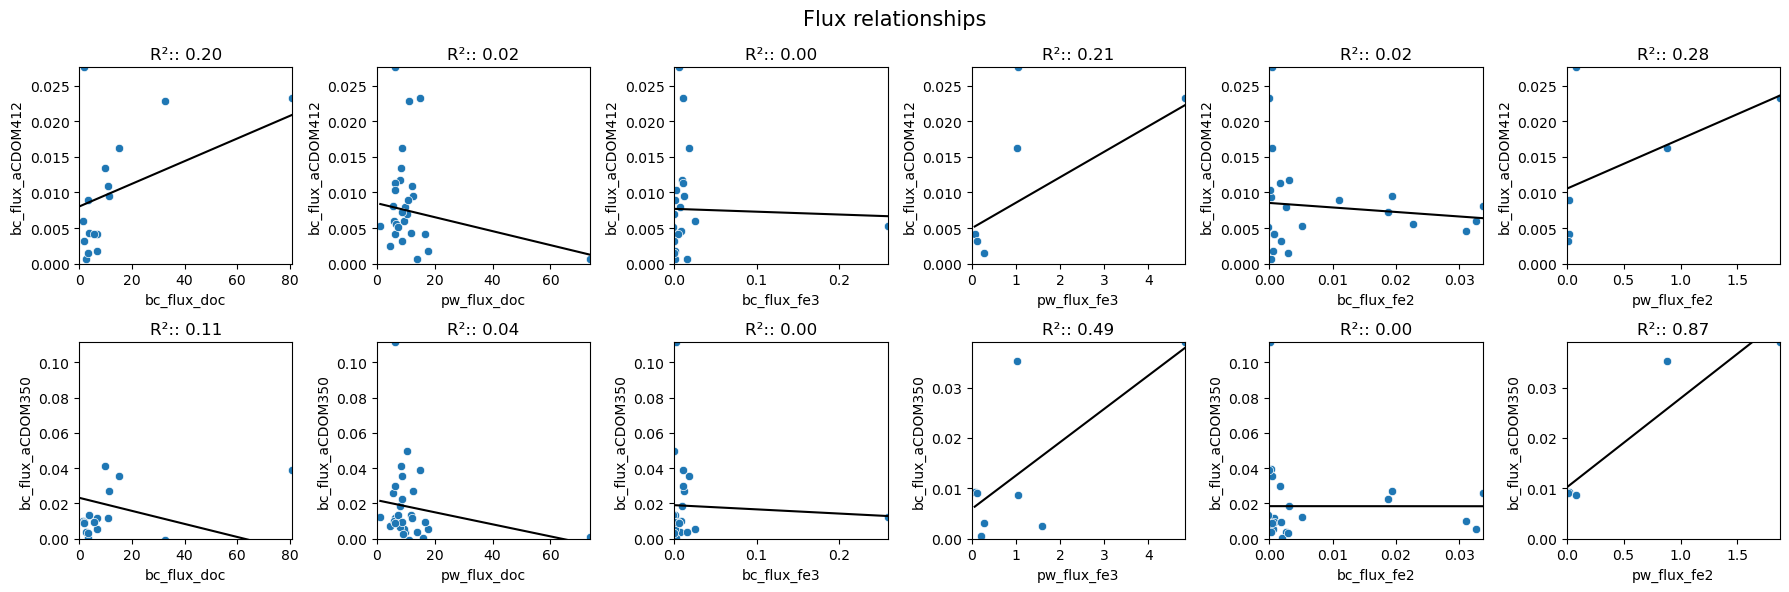

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 6))

# Loop through the subplots
for i, x_var in enumerate(['bc_flux_doc', 'pw_flux_doc','bc_flux_fe3', 'pw_flux_fe3','bc_flux_fe2', 'pw_flux_fe2']):
    for j, y_var in enumerate(['bc_flux_aCDOM412', 'bc_flux_aCDOM350']):
        # Prepare the data for the subplot
        data = df[[x_var, y_var]]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        
        # Fit a linear regression model to the data
        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        # Plot the data and regression line
        ax = axes[j, i]
        sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, legend=False)
        sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

        ax.set_title(f'R\u00B2:: {score:.2f}')
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

        
# Adjust the layout of the subplots
fig.suptitle('Flux relationships', size = 15)
fig.set_facecolor('w')
plt.tight_layout()

plt.show()

In [58]:
df

camp  station        date  Max_pressure  \
code                                                          
St.11_GOM2021    GOM2021    St.11  2021-07-25       946.986   
St.13_GOM2021    GOM2021    St.13  2021-07-21       321.519   
St.14_GOM2021    GOM2021    St.14  2021-07-19        91.278   
St.15_GOM2021    GOM2021    St.15  2021-07-23       287.295   
St.16_GOM2021    GOM2021    St.16  2021-07-24        61.804   
St.2_GOM2021     GOM2021     St.2  2021-07-22        63.413   
St.4_GOM2021     GOM2021     St.4  2021-07-17        17.437   
St.5B_GOM2021    GOM2021    St.5B  2021-07-16        12.856   
St.7_GOM2021     GOM2021     St.7  2021-07-26        39.529   
St.9_GOM2021     GOM2021     St.9  2021-07-20        79.028   
St.MK_GOM2021    GOM2021    St.MK  2021-07-15        16.981   
St.ML_GOM2021    GOM2021    St.ML  2021-07-27        14.595   
St.11_GOM21FA    GOM21FA    St.11  2021-11-10       916.966   
St.12_GOM21FA    GOM21FA    St.12  2021-11-09       960.512   
St.13_GOM21FA    GOM21FA    St.13  2021-11-07       448.876   
St.14_GOM21FA    GOM21FA    St.14  2021-10-31        88.896   
St.14.5_GOM21FA  GOM21FA  St.14.5  2021-11-01       104.344   
St.15_GOM21FA    GOM21FA    St.15  2021-11-02       263.293   
St.16_GOM21FA    GOM21FA    St.16  2021-11-08        58.940   
St.16-2_GOM21FA  GOM21FA  St.16-2  2021-11-12        15.517   
St.2_GOM21FA     GOM21FA     St.2  2021-11-02        62.458   
St.4_GOM21FA     GOM21FA     St.4  2021-10-26        17.006   
St.5B_GOM21FA    GOM21FA    St.5B  2021-10-25        12.869   
St.6_GOM21FA     GOM21FA     St.6  2021-10-25        13.849   
St.7_GOM21FA     GOM21FA     St.7  2021-10-31        38.371   
St.9_GOM21FA     GOM21FA     St.9  2021-11-01        81.090   
St.MK_GOM21FA    GOM21FA    St.MK  2021-10-27        17.149   
St.MK-2_GOM21FA  GOM21FA  St.MK-2  2021-10-30        13.611   
St.13_GOM22SP    GOM22SP    St.13  2022-04-18       557.668   
St.14_GOM22SP    GOM22SP    St.14  2022-04-09        88.922   
St.15_GOM22SP    GOM22SP    St.15  2022-04-16       263.450   
St.16_GOM22SP    GOM22SP    St.16  2022-04-11        57.412   
St.2_GOM22SP     GOM22SP     St.2  2022-04-17        63.432   
St.4_GOM22SP     GOM22SP     St.4  2022-04-20        16.450   
St.5B_GOM22SP    GOM22SP    St.5B  2022-04-14        13.664   
St.7_GOM22SP     GOM22SP     St.7  2022-04-10        39.548   
St.9_GOM22SP     GOM22SP     St.9  2022-04-16        79.039   
St.MK_GOM22SP    GOM22SP    St.MK  2022-04-19        17.800   
St.11_GOM22SU    GOM22SU    St.11  2022-07-22       945.291   
St.12_GOM22SU    GOM22SU    St.12  2022-07-21       996.658   
St.13_GOM22SU    GOM22SU    St.13  2022-07-18       487.498   
St.14_GOM22SU    GOM22SU    St.14  2022-07-16        86.455   
St.15_GOM22SU    GOM22SU    St.15  2022-07-15       266.624   
St.16_GOM22SU    GOM22SU    St.16  2022-07-20        57.999   
St.2_GOM22SU     GOM22SU     St.2  2022-07-19        62.421   
St.4_GOM22SU     GOM22SU     St.4  2022-07-10        17.075   
St.5B_GOM22SU    GOM22SU    St.5B  2022-07-10        12.409   
St.7_GOM22SU     GOM22SU     St.7  2022-07-12        41.135   
St.9_GOM22SU     GOM22SU     St.9  2022-07-17        79.973   
St.MK_GOM22SU    GOM22SU    St.MK  2022-07-23        17.611   

                 Pressure_dbar_surface  O2_mgL_surface  latitude_surface  \
code                                                                       
St.11_GOM2021                    2.076          7.3366          28.21678   
St.13_GOM2021                    2.283          6.2980          28.53696   
St.14_GOM2021                    1.829          6.3473          28.72514   
St.15_GOM2021                    2.191          9.0433          28.94254   
St.16_GOM2021                    1.277          7.4623          28.88042   
St.2_GOM2021                     2.074          6.8821          28.89964   
St.4_GOM2021                     1.145          8.2318          28.79886   
St.5B_GOM2021                    1.505          7.6929     

# Define the variables to plot
variables = ['bc_slope_inflec','O2_mgL_bottom', 'NPOC_uMol_Stock_wc',
             'O2_uM_surface', 'O2_uM_bottom', 'Slope',
             'Slope_pressure', 'Slope_pressure_percent',
             'Cg_5cm_deep/M2', 'Cg_15cm_deep/M2', 'Cg_30cm_deep/M2',
             'OCg_5cm_deep/M2', 'OCg_15cm_deep/M2', 'OCg_30cm_deep/M2',
             'ICg_5cm_deep/M2', 'ICg_15cm_deep/M2', 'ICg_30cm_deep/M2',
             'Ng_5cm_deep/M2', 'Ng_15cm_deep/M2', 'Ng_30cm_deep/M2',
             'Sg_5cm_deep/M2', 'Sg_15cm_deep/M2', 'Sg_30cm_deep/M2', 'Lat', 'Lon',
             'Fe2:Fe3', 'Fe3:Fe2', 'Fe2/m2', 'Fe3/m2', 'FeT/m2',
             'r2_slope_inflec', 'bc_flux_aCDOM412', 'bc_flux_aCDOM350',
             'bc_flux_doc', 'pw_flux_doc', 'bc_flux_tn', 'pw_flux_tn', 'bc_flux_fe2',
             'pw_flux_fe2', 'bc_flux_fe3', 'pw_flux_fe3']

 #'Camp', 'Stn',


# Create a pairplot with correlation coefficients
sns.set(style='ticks')
pairplot = sns.pairplot(df[variables], kind='reg', diag_kind='kde',
                        plot_kws=dict(line_kws={'color': 'red'}), diag_kws=dict(shade=True))

# Set the axis labels and title
for i, var in enumerate(variables):
    pairplot.axes[variables.index(var), 0].set_ylabel(var.replace('TN_uM', 'N (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('a_412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a_350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'))
    pairplot.axes[-1, i].set_xlabel(var.replace('TN_uM', 'N (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('a_412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)').replace('a_350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'))
pairplot.fig.suptitle('Pore Water Variables Pairplot')

plt.tight_layout()

# Show the plot
plt.show()


# Print out the correlation coefficients for all pairs of variables
Frames = []


# Define the variables to plot
variables = ['Max_pressure', 'Pressure_dbar_surface',
             'O2_mgL_surface', 'NPOC_uMol_Stock_wc'
             'Pressure_dbar_bottom', 'O2_mgL_bottom', 'O2_uM_surface',
             'O2_uM_bottom', 'Slope',
             'Slope_pressure', 'Slope_pressure_percent',
             'Cg_5cm_deep/M2', 'Cg_15cm_deep/M2', 'Cg_30cm_deep/M2',
             'OCg_5cm_deep/M2', 'OCg_15cm_deep/M2', 'OCg_30cm_deep/M2',
             'ICg_5cm_deep/M2', 'ICg_15cm_deep/M2', 'ICg_30cm_deep/M2',
             'Ng_5cm_deep/M2', 'Ng_15cm_deep/M2', 'Ng_30cm_deep/M2',
             'Sg_5cm_deep/M2', 'Sg_15cm_deep/M2', 'Sg_30cm_deep/M2', 'Lat', 'Lon',
             'Fe2:Fe3', 'Fe3:Fe2', 'Fe2/m2', 'Fe3/m2', 'FeT/m2', 'bc_slope_inflec',
             'r2_slope_inflec', 'bc_flux_aCDOM412', 'bc_flux_aCDOM350',
             'bc_flux_doc', 'pw_flux_doc', 'bc_flux_tn', 'pw_flux_tn', 'bc_flux_fe2',
             'pw_flux_fe2', 'bc_flux_fe3', 'pw_flux_fe3']

correlations = df[variables].corr()
correlations_list = []
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i < j:
            corr = correlations.loc[var1, var2]
            corr2 = corr**2
            correlations_list.append((var1, var2, corr2))
            print(f"{var1} vs {var2}: {corr2:.2f}")

            
            dict = {'mes_x':[var1],
                    'mes_y':[var2],
                    'corr':[corr2]}
            sums = pd.DataFrame(dict)
            Frames.append(sums)

sums = pd.concat(Frames, axis=0, ignore_index=False)
sums.to_csv('../Dissertation_projects/Data/Stats_data_sets/sums_coro.csv')

sums

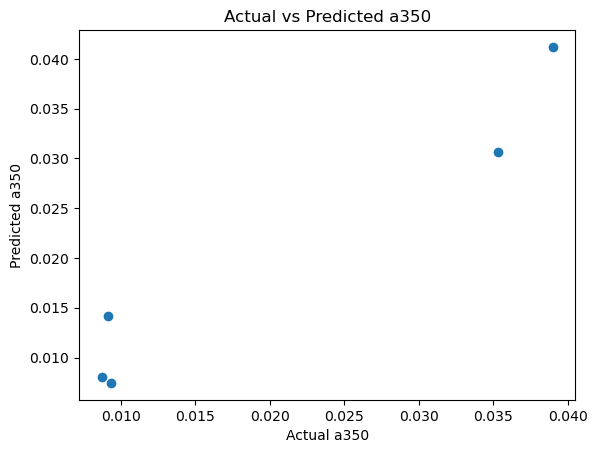

In [59]:
formula = 'bc_flux_aCDOM350 ~ pw_flux_doc+pw_flux_fe2+O2_uM_bottom'

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df).fit()

# Convert relevant columns to numpy arrays
CDOM = df['bc_flux_aCDOM350'].values
pw_flux_doc = df['pw_flux_doc'].values
pw_flux_fe2 = df['pw_flux_fe2'].values
O2_uM_bottom = df['O2_uM_bottom'].values


# Assuming interaction terms and so on, you might create a design matrix for predictions:
X = np.column_stack((
    np.ones(CDOM.shape[0]),  # Intercept
    pw_flux_doc, 
    pw_flux_fe2, 
    O2_uM_bottom, 
    #Fe3_uM_array * TN_uM_array,       # Interaction term: Fe3_uM:TN_uM
    #Fe3_uM_array * NPOC_uM_array,    # Interaction term: Fe3_uM:NPOC_uM
    #TN_uM_array * NPOC_uM_array,     # Interaction term: TN_uM:NPOC_uM
    #Fe3_uM_array * TN_uM_array * NPOC_uM_array  # Interaction term: Fe3_uM:TN_uM:NPOC_uM
))


# Predict using the model parameters and the design matrix
predicted_a350 = model.params.values.dot(X.T)

# Insert predictions back to dataframe
df['predicted_a350'] = predicted_a350

# Plot
plt.scatter(df['bc_flux_aCDOM350'].values, predicted_a350)
plt.xlabel('Actual a350')
plt.ylabel('Predicted a350')
plt.title('Actual vs Predicted a350')
plt.plot([min(df['bc_flux_aCDOM350']), max(df['bc_flux_aCDOM350'])], 
         [min(df['bc_flux_aCDOM350']), max(df['bc_flux_aCDOM350'])], 'r--')
plt.show()